# *【Project】* E-commerce order anomaly detection


* Data Sources: actual transaction data of China's top 500 companies

* #### The core value of e-commerce: higher transaction efficiency
* #### Order anomaly detection: the helper of merchants, the grasper of the platform
* #### Data Exploration: deep Exploration of e-commerce order data
* #### Model building: automate the detection of e-commerce order anomalies

* 1. Import dataset, understanding of data

    1.1 Data discovery: understand the basic characteristics of order data\
    1.2 Missing data handling: is missing information related to anomalies?\
    1.3 Duplicate data handling: hidden problem behind order duplication.\
    1.4 Anomaly data detection: are feature anomalies related to transaction anomalies?    

In [132]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['Simhei'] # Show chinese characters
plt.rcParams['axes.unicode_minus']=False  # Show minus

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Import dataset, understanding of data

In [133]:
data = pd.read_csv('abnormal_orders.txt')

### 1.1 Data discovery.

In [3]:
data.head()

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
0,4277880103,2013-10-17,13:09:16,NaN,GO,8000001215,NaN,1000.0,1000,游戏站点,当当支付,murongchun,北京市,0
1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,1
2,4277700101,2013-08-27,14:26:38,NaN,GO,7000000960,国之美艺术品,8000.0,160,do.site_id,在线支付,1391175862,NaN,1
3,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,1
4,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,1


In [134]:
data.shape

(134190, 14)

In [5]:
data.columns

Index(['order_id', 'order_date', 'order_time', 'cat', 'attribution', 'pro_id',
       'pro_brand', 'total_money', 'total_quantity', 'order_source',
       'pay_type', 'user_id', 'city', 'abnormal_label'],
      dtype='object')

order date

In [6]:
data.order_date.value_counts()

2013-10-31    690
2013-03-21    429
2013-11-01    426
2013-01-24    422
2013-03-23    416
             ... 
2013-07-31     17
2013-08-31     14
2013-01-31      2
2013-03-31      2
2013-05-31      2
Name: order_date, Length: 364, dtype: int64

#### duplicated order id

In [7]:
data.order_id.duplicated().sum()

19212

order categories

In [8]:
data.cat.value_counts()

手机摄影数码       20612
生活电器厨卫电器     19281
家纺寝居         18679
电脑办公打印文仪     11405
家居日用         10642
电视冰箱洗衣机空调     9067
美妆个护          9043
汽车用品          6490
家具建材          4941
食品酒水          4669
健康医疗          4252
服饰鞋帽          4067
运动户外          3934
母婴用品玩具        2664
箱包奢品          1962
钟表首饰           860
图书音像           232
Name: cat, dtype: int64

In [9]:
data.attribution.value_counts()

GO     91170
POP    43020
Name: attribution, dtype: int64

In [10]:
(data.attribution=='GO').sum()/data.shape[0]

0.6794097920858484

In [11]:
data.order_source.value_counts()

主站            96894
抢购            16256
手机站点           7098
团购             6294
手机抢购           3095
do.site_id     2394
手机团购           1074
充值              703
当当              377
游戏站点              5
Name: order_source, dtype: int64

In [12]:
data.pay_type.value_counts()

合并支付    104274
货到付款     26785
当当支付      2511
在线支付       421
账户余额       199
Name: pay_type, dtype: int64

In [13]:
data.city.value_counts()

北京市        14554
上海市         6637
广州市         6033
深圳市         5468
天津市         3393
           ...  
果洛州            1
昌都地区           1
四川省其他城市        1
江西省其他城市        1
神农架林区          1
Name: city, Length: 365, dtype: int64

In [14]:
data.abnormal_label.value_counts()

0    105733
1     28457
Name: abnormal_label, dtype: int64

#### general informations of data features

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134190 entries, 0 to 134189
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        134190 non-null  int64  
 1   order_date      134190 non-null  object 
 2   order_time      134190 non-null  object 
 3   cat             132800 non-null  object 
 4   attribution     134190 non-null  object 
 5   pro_id          134190 non-null  int64  
 6   pro_brand       133418 non-null  object 
 7   total_money     134189 non-null  float64
 8   total_quantity  134190 non-null  int64  
 9   order_source    134190 non-null  object 
 10  pay_type        134190 non-null  object 
 11  user_id         134190 non-null  object 
 12  city            134188 non-null  object 
 13  abnormal_label  134190 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 14.3+ MB


In [16]:
data.select_dtypes(exclude='object').head()

,order_id,pro_id,total_money,total_quantity,abnormal_label
0,4277880103,8000001215,1000.0,1000,0
1,4283851335,8002042497,766000.0,200,1
2,4277700101,7000000960,8000.0,160,1
3,4276537082,8001992420,19900.0,100,1
4,4281111595,8002199518,100.0,100,1


In [20]:
data.select_dtypes(include='object').head()

,order_date,order_time,cat,attribution,pro_brand,order_source,pay_type,user_id,city
0,2013-10-17,13:09:16,NaN,GO,NaN,游戏站点,当当支付,murongchun,北京市
1,2013-09-23,14:09:49,手机摄影数码,POP,三星,主站,合并支付,dakehu_zy,上海市
2,2013-08-27,14:26:38,NaN,GO,国之美艺术品,do.site_id,在线支付,1391175862,NaN
3,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,樱花,主站,合并支付,qq-3be293b,泉州市
4,2013-04-10,10:44:46,家具建材,POP,纬度空间,主站,合并支付,nonscorpio,广州市


### 1.2 Missing data handling

In [135]:
# missing percentage for each column
data.isnull().mean()*100

order_id          0.000000
order_date        0.000000
order_time        0.000000
cat               1.035845
attribution       0.000000
pro_id            0.000000
pro_brand         0.575304
total_money       0.000745
total_quantity    0.000000
order_source      0.000000
pay_type          0.000000
user_id           0.000000
city              0.001490
abnormal_label    0.000000
dtype: float64

There are missing values, but the proportion of missing is very small. Among them, there are 1 and 2 missing values for city and total_money, which can be ignored. In the high-quality and uneven e-commerce field, the lack of pro_brand information is not worth noting, and it is enough to investigate the situation of missing values in the 'cat'.

'cat' has 1.03% missing values, normally can directly drop these samples, but considering that missing informative values may be related to 'abnormal_label'.

* Check the proportion of samples with missing and 'abnormal_label' in each feature to all missing samples for that feature.

* A high ratio indicates that missing of the feature largely points to transaction anomalies, and the missing is strongly related to transaction anomalies.

In [137]:
for i in ['cat', 'pro_brand']:
    ratio1 = 100* data.loc[data[i].isnull(),'abnormal_label'].sum() / data[i].isnull().sum()
    # can use also with : data[data[i].isnull() & data['abnormal_label']==1].shape[0] / data[i].isnull().sum()
    print('abnormal rate in {} missing samples is{: .3f}%'.format(i, ratio1))

abnormal rate in cat missing samples is 11.727%
abnormal rate in pro_brand missing samples is 20.984%


These values indicate that the product will not be judged as abnormal transaction because of missing 'cat' or 'pro_brand', and the relationship between missing and 'abnormal_label' is not large.

* Check the proportion of abnormal samples with missing values for each feature in all transaction abnormal samples.
* High ratio indicates that the samples with missing features are of great significance to 'abnormal_label' and cannot be easily deleted.

In [138]:
for i in ['cat', 'pro_brand']:
    ratio2 = 100* data.loc[data[i].isnull(),'abnormal_label'].sum() / data['abnormal_label'].sum()
    print('{} missing rate in abnormal samples is{: .3f}%'.format(i, ratio2))

cat missing rate in abnormal samples is 0.573%
pro_brand missing rate in abnormal samples is 0.569%


This value indicates that among all abnormal transaction samples, the proportion of missing samples is very small and can be deleted directly。

Drop null data

In [139]:
data.dropna(how='any', inplace=True)

In [140]:
data.shape

(132761, 14)

In [29]:
data.isnull().sum()

order_id          0
order_date        0
order_time        0
cat               0
attribution       0
pro_id            0
pro_brand         0
total_money       0
total_quantity    0
order_source      0
pay_type          0
user_id           0
city              0
abnormal_label    0
dtype: int64

Reset the index for data

In [141]:
data.index = range(data.shape[0])
data.index

RangeIndex(start=0, stop=132761, step=1)

In [142]:
(data.abnormal_label == 1).sum()

28284

### 1.3 Duplicated data handling

In [143]:
data.duplicated().sum()

8

In [144]:
data.drop_duplicates(inplace=True)

After dropping duplicated rows, explore more on order_id duplications.

In [145]:
data.order_id.duplicated().sum()

18546

In [38]:
data.order_id.value_counts()

4279118253    32
4269390206    23
4271884108    20
4275856215    20
4265415474    19
              ..
4146667708     1
4146667654     1
4146661886     1
4146657953     1
4285770056     1
Name: order_id, Length: 114207, dtype: int64

In [41]:
# check one of them, to understand more
data[data.order_id == 4279118253]

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
95213,4279118253,2013-07-23,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95214,4279118253,2013-11-08,23:22:21,家具建材,GO,1000147804,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95215,4279118253,2013-01-26,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95216,4279118253,2013-02-03,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95217,4279118253,2013-07-06,23:22:21,家具建材,GO,1000147606,西门子,20.6,1,主站,合并支付,cxh0111,湛江市,0
95218,4279118253,2013-04-28,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95219,4279118253,2013-10-04,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95220,4279118253,2013-02-21,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95221,4279118253,2013-06-18,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0
95222,4279118253,2013-09-25,23:22:21,家具建材,GO,1000147826,西门子,10.6,1,主站,合并支付,cxh0111,湛江市,0


For order_id = 4279118253, order times are the same, with different order date, find some abnormal....

In [146]:
(data.order_id.value_counts()>1).sum()

12015

In [147]:
DupOrder = data.order_id.value_counts().index
DupOrder

Int64Index([4279118253, 4269390206, 4271884108, 4275856215, 4265415474,
            4279551124, 4283874398, 4283873538, 4283874524, 4283339603,
            ...
            4146673872, 4146673733, 4146673535, 4146672339, 4146668187,
            4146667708, 4146667654, 4146661886, 4146657953, 4285770056],
           dtype='int64', length=114207)

In [148]:
for i in DupOrder[:100]:
    AbOrder = (data.loc[data['order_id'] == i, 'abnormal_label']).sum()
    if AbOrder > 0:
        print(i, ':', AbOrder)

4271884108 : 20
4275856215 : 20
4193043860 : 16
4272902282 : 15
4263198458 : 14
4281345265 : 13
4279735193 : 13
4278223689 : 13
4282015346 : 12
4281811657 : 11
4282976651 : 10


Having these orders with duplicated order_id and labeled as abnormal in dataset.

In [89]:
# check one of them, to understand more
data[data.order_id == 4271884108]

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
3980,4271884108,2013-04-30,09:41:31,服饰鞋帽,POP,8002089657,PPZ,178.0,2,手机站点,合并支付,gome_taozx,广州市,1
3981,4271884108,2013-10-09,09:41:31,服饰鞋帽,POP,8000345913,漫路,176.0,2,手机站点,合并支付,gome_taozx,广州市,1
15817,4271884108,2013-09-06,09:41:31,服饰鞋帽,POP,8002287340,jstfe,49.0,1,手机站点,合并支付,gome_taozx,广州市,1
15818,4271884108,2013-09-30,09:41:31,服饰鞋帽,POP,8002287341,jstfe,49.0,1,手机站点,合并支付,gome_taozx,广州市,1
15819,4271884108,2013-09-16,09:41:31,服饰鞋帽,POP,8002206973,梵利玛,109.0,1,手机站点,合并支付,gome_taozx,广州市,1
15820,4271884108,2013-07-27,09:41:31,服饰鞋帽,POP,8002206218,唐狮,199.0,1,手机站点,合并支付,gome_taozx,广州市,1
15821,4271884108,2013-01-28,09:41:31,服饰鞋帽,POP,8002094791,SUCK-II,139.0,1,手机站点,合并支付,gome_taozx,广州市,1
15822,4271884108,2013-03-30,09:41:31,服饰鞋帽,POP,8002093564,占姆士,129.0,1,手机站点,合并支付,gome_taozx,广州市,1
15823,4271884108,2013-12-10,09:41:31,服饰鞋帽,POP,8002161945,占姆士,119.0,1,手机站点,合并支付,gome_taozx,广州市,1
15824,4271884108,2013-11-30,09:41:31,服饰鞋帽,POP,8002093298,骑士保罗,79.0,1,手机站点,合并支付,gome_taozx,广州市,1


Verifying if an duplicated order with order_id labeled as abnormal for any sample, then all of those duplicated samples are also labeled as abnormal.

In [149]:
label_1 = data.loc[data['abnormal_label']==1, 'order_id'].value_counts()
[*enumerate(label_1.index)]

[(0, 4271884108),
 (1, 4275856215),
 (2, 4193043860),
 (3, 4272902282),
 (4, 4263198458),
 (5, 4281345265),
 (6, 4279735193),
 (7, 4278223689),
 (8, 4282015346),
 (9, 4281811657),
 (10, 4282976651),
 (11, 4027541751),
 (12, 4247201783),
 (13, 4240017837),
 (14, 4282553833),
 (15, 4281417991),
 (16, 4277611362),
 (17, 4281417620),
 (18, 4277607336),
 (19, 4272498751),
 (20, 4279334064),
 (21, 4279816108),
 (22, 4267386744),
 (23, 4275755991),
 (24, 4277105518),
 (25, 4277917226),
 (26, 4275035624),
 (27, 4283416629),
 (28, 3551715268),
 (29, 3886616252),
 (30, 4264223166),
 (31, 4275252046),
 (32, 4276313753),
 (33, 4282769164),
 (34, 4282553935),
 (35, 4140332081),
 (36, 4281466102),
 (37, 4273264746),
 (38, 4276426978),
 (39, 4277104993),
 (40, 3761365740),
 (41, 4279315870),
 (42, 4264981384),
 (43, 4276226039),
 (44, 4277830779),
 (45, 4221098187),
 (46, 4285335281),
 (47, 4243845987),
 (48, 4241709677),
 (49, 4253872484),
 (50, 4285335839),
 (51, 3994574274),
 (52, 4144192810),
 (5

For each order_id that contains transaction abnormal samples, calculate the proportion of abnormal samples under this order_id to all samples under this order_id

In [150]:
df = pd.DataFrame()
for idx,i in enumerate(label_1.index):
    ratio = label_1[i] / data[data['order_id'] == i].shape[0]
    df.loc[idx, 'order_id'] = i
    df.loc[idx, 'duplicated_order_abnormal_ratio'] = ratio

In [151]:
df.duplicated_order_abnormal_ratio.value_counts()

1.0    25102
0.5        5
Name: duplicated_order_abnormal_ratio, dtype: int64

The previous observation is almost correct, which means that if any sample under an order_id is labeld as abnormal, then all samples under the entire order_id will be labeled as abnormal transaction. This can be used to correct the predicted labels when making predictions later.

In [112]:
# check one of them, to understand more
data[data['order_id'] == 4193043860].head()

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
1118,4193043860,2013-06-23,22:50:54,生活电器厨卫电器,POP,8000325989,飞利浦,690.0,5,主站,合并支付,ye519888,惠州市,1
3794,4193043860,2013-07-19,22:50:54,生活电器厨卫电器,GO,1000365248,飞利浦,334.0,2,主站,合并支付,ye519888,惠州市,1
11939,4193043860,2013-01-05,22:50:54,手机摄影数码,GO,1000366925,华为,2288.0,1,主站,合并支付,ye519888,惠州市,1
11940,4193043860,2013-02-02,22:50:54,生活电器厨卫电器,GO,1000308290,奔腾,68.0,1,主站,合并支付,ye519888,惠州市,1
11941,4193043860,2013-08-27,22:50:54,生活电器厨卫电器,GO,1000310218,飞利浦,228.0,1,主站,合并支付,ye519888,惠州市,1


In [152]:
data.loc[data['order_id'] == 4193043860, 'pro_id'].duplicated().sum()

0

In [153]:
data.abnormal_label.sum()

28284

same order_id has different order_date and same order_time, order_date may be fake.

for abnormal samples, if pro_id are different for same order_id, samples are not fake.

Deduplicating after dropping the order_date feature. If abnormal samples no decreasing, that means no fake sample.

In [154]:
data2 = data.drop(columns='order_date')
data2.duplicated().sum()

1471

Dropping duplicated

In [155]:
data.drop(index=data[data2.duplicated()].index, inplace=True)

In [156]:
data['order_id'].value_counts()

4269390206    23
4271884108    20
4275856215    20
4265415474    19
4283874688    18
              ..
4144311846     1
4283495517     1
4283496150     1
4144240046     1
4285770056     1
Name: order_id, Length: 114207, dtype: int64

comparing with duplicated order_id before:

4279118253    32

4269390206    23

4271884108    20

4275856215    20

4265415474    19

              ..
              
4146667708     1

4146667654     1

4146661886     1

4146657953     1

4285770056     1

Name: order_id, Length: 114207, dtype: int64

Now there's no more duplicated pro_id appeared under same order_id.

In [124]:
# check one of them
data[data['order_id'] == 4269390206]

,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
76914,4269390206,2013-09-26,02:11:10,电视冰箱洗衣机空调,GO,1000324051,夏普,2588.0,1,主站,合并支付,1390109546,西安市,0
76915,4269390206,2013-03-09,02:11:10,电视冰箱洗衣机空调,POP,8002267703,夏普,14999.0,1,主站,合并支付,1390109546,西安市,0
76916,4269390206,2013-09-21,02:11:10,电视冰箱洗衣机空调,GO,1000324052,夏普,3888.0,1,主站,合并支付,1390109546,西安市,0
76917,4269390206,2013-01-23,02:11:10,家居日用,GO,1000174960,伟经,275.0,1,主站,合并支付,1390109546,西安市,0
76918,4269390206,2013-11-12,02:11:10,电脑办公打印文仪,GO,1000315933,中亿,738.0,1,主站,合并支付,1390109546,西安市,0
76919,4269390206,2013-05-03,02:11:10,生活电器厨卫电器,GO,1000320932,凯伍德,1690.0,1,主站,合并支付,1390109546,西安市,0
76920,4269390206,2013-05-02,02:11:10,家居日用,GO,1000336076,康宁,439.0,1,主站,合并支付,1390109546,西安市,0
76921,4269390206,2013-12-19,02:11:10,家居日用,GO,1000192284,国研联合,158.0,1,主站,合并支付,1390109546,西安市,0
76922,4269390206,2013-10-28,02:11:10,家居日用,GO,1000104751,苏泊尔,459.0,1,主站,合并支付,1390109546,西安市,0
76923,4269390206,2013-12-05,02:11:10,家居日用,GO,1000104746,苏泊尔,229.0,1,主站,合并支付,1390109546,西安市,0


In [157]:
data.index = range(data.shape[0])

In [158]:
data.abnormal_label.sum() # same as before

28284

### 1.4 Abnormal data handling

Is statical abnormal related to business abnormal?

* Distribution and statistical inference for numbers' features

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131282 entries, 0 to 131281
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        131282 non-null  int64  
 1   order_date      131282 non-null  object 
 2   order_time      131282 non-null  object 
 3   cat             131282 non-null  object 
 4   attribution     131282 non-null  object 
 5   pro_id          131282 non-null  int64  
 6   pro_brand       131282 non-null  object 
 7   total_money     131282 non-null  float64
 8   total_quantity  131282 non-null  int64  
 9   order_source    131282 non-null  object 
 10  pay_type        131282 non-null  object 
 11  user_id         131282 non-null  object 
 12  city            131282 non-null  object 
 13  abnormal_label  131282 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 14.0+ MB


In [128]:
data.loc[:, ['total_money', 'total_quantity']].describe()

,total_money,total_quantity
count,131282.000000,131282.000000
mean,667.187834,1.188975
std,2930.730828,1.684653
min,0.500000,1.000000
25%,29.000000,1.000000
50%,98.000000,1.000000
75%,379.000000,1.000000
max,766000.000000,200.000000


Confirm that there are no 'total_money' less than 0 that should not appear in the business. There may be a large number of anomalies in both continuous variables, from the distribution plot.

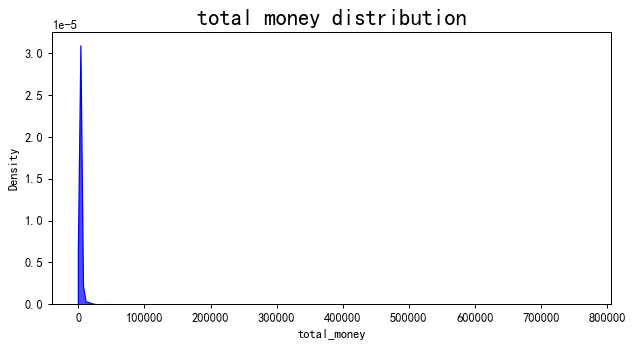

In [164]:
import seaborn as sns

plt.figure(figsize=(8,4), dpi=90)
sns.kdeplot(data['total_money'], shade=True, color='b', label='total_money', alpha=.7)
plt.title('total money distribution', fontsize=18)
plt.show()

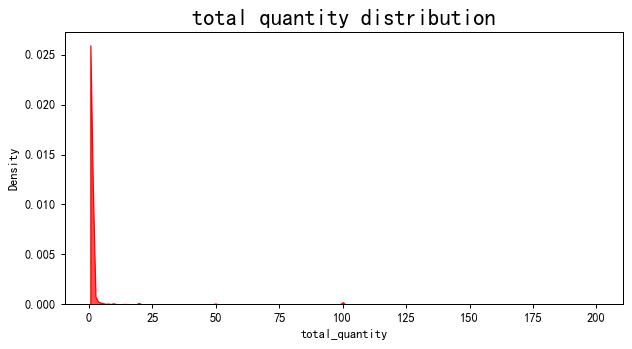

In [165]:
plt.figure(figsize=(8,4), dpi=90)
sns.kdeplot(data['total_quantity'], shade=True, color='r', label='total_quantity', alpha=.7)
plt.title('total quantity distribution', fontsize=18)
plt.show()

* Detecting outliers, the rule of the boxplot:

        When sample's value exceeds [QL - 1.5IQR, QU + 1.5IQR], the sample is considered to be an outlier\
        QL: lower quartile, QU: upper quartile, IQR: QU-QL
       
From the extremely right skewed data, the situation of abnormal characteristics is: placing too many orders at one time, or paying too much at one time, but this is achievable in the actual business of e-commerce.

In [306]:
# outlier detection
NumOfSamples = data.shape[0]
DataNoAbnormal = data.copy()
BoxAbnormalIdx = []
for column in ['total_money','total_quantity']:
    feature = data[column]
    QL = np.quantile(feature, 0.25)
    QU = np.quantile(feature, 0.75)
    IQR = QU - QL
    #error = feature[((feature < (QL - 1.5*IQR)).astype(int) + (feature > (QU + 1.5*IQR)).astype(int)) != 0]
    #error = feature[(feature< QL-1.5*IQR)+ (feature> QU +1.5*IQR)]
    error = feature[feature.apply(lambda x: x< QL-1.5*IQR or x> QU +1.5*IQR)]
    BoxAbnormalIdx.extend(error.index)

In [307]:
len(BoxAbnormalIdx)

31266

In [308]:
BoxAbnormalIdx = set(BoxAbnormalIdx)
len(BoxAbnormalIdx)

29949

In [309]:
len(BoxAbnormalIdx)/data.shape[0] #  22.8%, can't drop

0.22812723754970216

In [310]:
data.loc[BoxAbnormalIdx, 'abnormal_label'].sum()

7368

In [311]:
data.loc[BoxAbnormalIdx, 'abnormal_label'].sum() / data.abnormal_label.sum() 

0.2605006364022062

More than 1/4, so the abnormal feature samples cannot be deleted directly, but there should be no direct relationship between the abnormality of the feature and the abnormality of the transaction. Can form a new feature according to whether there is a feature abnormality, and calculate the correlation between the new feature and abnormal_label

In [314]:
df = pd.DataFrame(0, index=data.index,columns=['abnormal_feature'])
df


,abnormal_feature
0,0
1,0
2,0
3,0
4,0
...,...
131277,0
131278,0
131279,0
131280,0


In [315]:
df.loc[BoxAbnormalIdx,'abnormal_feature'] = 1
df

,abnormal_feature
0,1
1,1
2,1
3,1
4,1
...,...
131277,1
131278,1
131279,0
131280,0


In [319]:
pd.concat([df['abnormal_feature'], data['abnormal_label']], axis=1).corr()

,abnormal_feature,abnormal_label
abnormal_feature,1.000000,0.040428
abnormal_label,0.040428,1.000000


It looks like there is a little bit relation between the feature anomaly and the transaction anomaly. From the perspective of abnormality, the mean value method is preferred or not processed, but handling of outliers must be carried out after spliting trainset and testset.

In [322]:
data.to_csv("cleaned_data.csv", index=False)

## 2. Feature encoding and modeling?

In [323]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [350]:
oe_col = ['order_id', 'cat', 'attribution', 'pro_id', 'pro_brand', 'order_source', 'pay_type', 'user_id', 'city']
data_oe = OrdinalEncoder().fit_transform(data[oe_col])
pd.DataFrame(data_oe)

,0,1,2,3,4,5,6,7,8
0,99753.0,5.0,1.0,15907.0,227.0,1.0,0.0,24870.0,5.0
1,56307.0,11.0,1.0,15431.0,1551.0,1.0,0.0,50713.0,207.0
2,81338.0,2.0,1.0,18402.0,2049.0,1.0,0.0,46259.0,133.0
3,7028.0,5.0,1.0,19080.0,377.0,1.0,0.0,62154.0,101.0
4,11982.0,3.0,1.0,18580.0,748.0,1.0,0.0,56469.0,223.0
...,...,...,...,...,...,...,...,...,...
131277,114202.0,11.0,0.0,4109.0,626.0,1.0,4.0,71827.0,50.0
131278,114203.0,11.0,0.0,4111.0,2363.0,1.0,4.0,71827.0,50.0
131279,114204.0,2.0,0.0,5964.0,803.0,7.0,0.0,2917.0,133.0
131280,114205.0,3.0,0.0,5318.0,1760.0,7.0,0.0,60089.0,8.0


In [339]:
data['order_time'] = data.order_time.apply(lambda x: int(x[:2]))

In [357]:
X = pd.concat([pd.DataFrame(data_oe, columns=oe_col), data[['order_time']], data[['total_money','total_quantity']]], axis=1)
X.head()

,order_id,cat,attribution,pro_id,pro_brand,order_source,pay_type,user_id,city,order_time,total_money,total_quantity
0,99753.0,5.0,1.0,15907.0,227.0,1.0,0.0,24870.0,5.0,14,766000.0,200
1,56307.0,11.0,1.0,15431.0,1551.0,1.0,0.0,50713.0,207.0,14,19900.0,100
2,81338.0,2.0,1.0,18402.0,2049.0,1.0,0.0,46259.0,133.0,10,100.0,100
3,7028.0,5.0,1.0,19080.0,377.0,1.0,0.0,62154.0,101.0,23,990.0,100
4,11982.0,3.0,1.0,18580.0,748.0,1.0,0.0,56469.0,223.0,16,8800.0,100


In [344]:
y = data.abnormal_label.values

In [346]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [347]:
rf = RFC(n_estimators=200, random_state=42).fit(Xtrain, ytrain)

In [348]:
rf.score(Xtrain, ytrain)

0.999989118251956

In [349]:
rf.score(Xtest, ytest) # overfitting

0.8294020566205408

In [358]:
gbdc = GBC(n_estimators=200, random_state=42).fit(Xtrain, ytrain)

In [359]:
gbdc.score(Xtrain, ytrain)

0.8122136740045921

In [360]:
gbdc.score(Xtest, ytest) 

0.8085057763107782

## 3. Deep digging: business based feature engineering and coding

Before the actual data preprocessing, it is hoped that features can be explored in detail to find the opportunity to increase the feature dimension from the business. For the current data set, the key to modeling is to be able to distinguish abnormal transactions from ordinary transactions. Therefore, it is necessary to find out the features that can help increase the direct difference between abnormal transactions and ordinary transaction samples, or can help measure the abnormal risk of samples. Now going to explore whether the following features exhibit specific properties on abnormal transactions, and derive new features based on these properties.

* order_time
* pay_type
* city
* cat & order_source & attribution
* user_id & pro_id & pro_brand
* total_money & total_quantity

And another pb: feature encoding. Discrete variables are often considered easily to encode (always use ordinal, one-hot encoding in sklearn), but in practice, these methods are not suitable for all scenarios. When feature engineering is done, all features also need to be encoded accordingly.

### 3.1. train set test set split

In the dataset, each sample is a transaction for a single commodity, multiple transactions constitute an order, and the labels of all samples under an order are consistent. In this case, it doesn't make sense to use some transactions in an order to predict whether other transactions in the same order are abnormal, because one *** transaction is abnormal, and the whole order is abnormal.***

Therefore, when spliting train set and test set, it must be ensured that the samples under the same order will not be divided into the training set and the test set at the same time, and order_id in test set must be the order_id that has not appeared in train set.

In [362]:
data = pd.read_csv("cleaned_data.csv")
data.columns

Index(['order_id', 'order_date', 'order_time', 'cat', 'attribution', 'pro_id',
       'pro_brand', 'total_money', 'total_quantity', 'order_source',
       'pay_type', 'user_id', 'city', 'abnormal_label'],
      dtype='object')

In [376]:
data.groupby('order_id').count().sort_values(by='cat', ascending=False)

,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,abnormal_label
order_id,,,,,,,,,,,,,
4269390206,23,23,23,23,23,23,23,23,23,23,23,23,23
4271884108,20,20,20,20,20,20,20,20,20,20,20,20,20
4275856215,20,20,20,20,20,20,20,20,20,20,20,20,20
4265415474,19,19,19,19,19,19,19,19,19,19,19,19,19
4283873946,18,18,18,18,18,18,18,18,18,18,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258851171,1,1,1,1,1,1,1,1,1,1,1,1,1
4258850504,1,1,1,1,1,1,1,1,1,1,1,1,1
4258850274,1,1,1,1,1,1,1,1,1,1,1,1,1


In [372]:
data.groupby('order_id').count().mean()

order_date        1.149509
order_time        1.149509
cat               1.149509
attribution       1.149509
pro_id            1.149509
pro_brand         1.149509
total_money       1.149509
total_quantity    1.149509
order_source      1.149509
pay_type          1.149509
user_id           1.149509
city              1.149509
abnormal_label    1.149509
dtype: float64

In [373]:
orderid = data.order_id.unique()

In [377]:
len(orderid)

114207

In [393]:
import random
random.seed(1111)

test_id = random.sample(orderid.tolist(), int(len(orderid)*0.3))
train_id = list(set(orderid)-set(test_id))

In [399]:
print(len(test_id), len(train_id))

34262 79945


In [421]:
train = data[data.order_id.apply(lambda x: x in train_id)]
test = data[data.order_id.apply(lambda x: x in test_id)]

In [422]:
train.shape

(91900, 14)

In [423]:
test.shape

(39382, 14)

In [409]:
39382/(39382+91900) # almost 30%

0.2999801953047638

In [427]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [444]:
train = pd.concat([train[train.columns[-1]],train[train.columns[:-1]]], axis=1)
test = pd.concat([test[test.columns[-1]],test[test.columns[:-1]]], axis=1)

In [449]:
test.head()

,abnormal_label,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city
0,1,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
1,0,3977175284,2013-03-13,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市
2,0,4245023523,2013-03-30,10:39:56,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市
3,0,4253622967,2013-01-27,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市
4,0,4276159555,2013-05-26,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市


In [450]:
train.to_csv('train_bf.csv')
test.to_csv('test_bf.csv')

Next, feature engineering and modeling. From this moment on, only explore the trainset, and only the information extracted from trainset will be used to process testset (except of objective features, such as time, etc.).

### 3.2 Abnormal vs normal order: is there a difference in order time?

In [975]:
train = pd.read_csv('train_bf.csv', index_col=0)
test = pd.read_csv('test_bf.csv', index_col=0)

* **relationship exploration**

In [953]:
import time
import datetime

In [976]:
Hour = train.order_time.apply(lambda x: int(x[:2]))
Hour

0        14
1        14
2        16
3        16
4        10
         ..
91895    23
91896    23
91897    23
91898    23
91899    23
Name: order_time, Length: 91900, dtype: int64

Count the number of transactions in each Hour

In [962]:
OrderTime_ab = Hour[train.abnormal_label==1].value_counts()
OrderTime_normal = Hour[train.abnormal_label==0].value_counts()
print(OrderTime_ab, OrderTime_normal, sep='\n')

21    1563
20    1520
10    1368
9     1360
11    1278
22    1269
12    1046
23    1015
13    1007
8     1001
19     983
16     962
15     938
14     857
0      806
18     800
17     721
1      353
7      262
2      188
6      181
3      117
5       91
4       78
Name: order_time, dtype: int64
22    6284
21    6202
20    5807
23    5529
11    4698
10    4651
13    4508
14    4093
12    4055
15    3974
16    3769
19    3579
9     3359
17    2893
18    2756
0     1870
8     1717
1      792
7      487
2      473
6      234
3      213
4      104
5       89
Name: order_time, dtype: int64


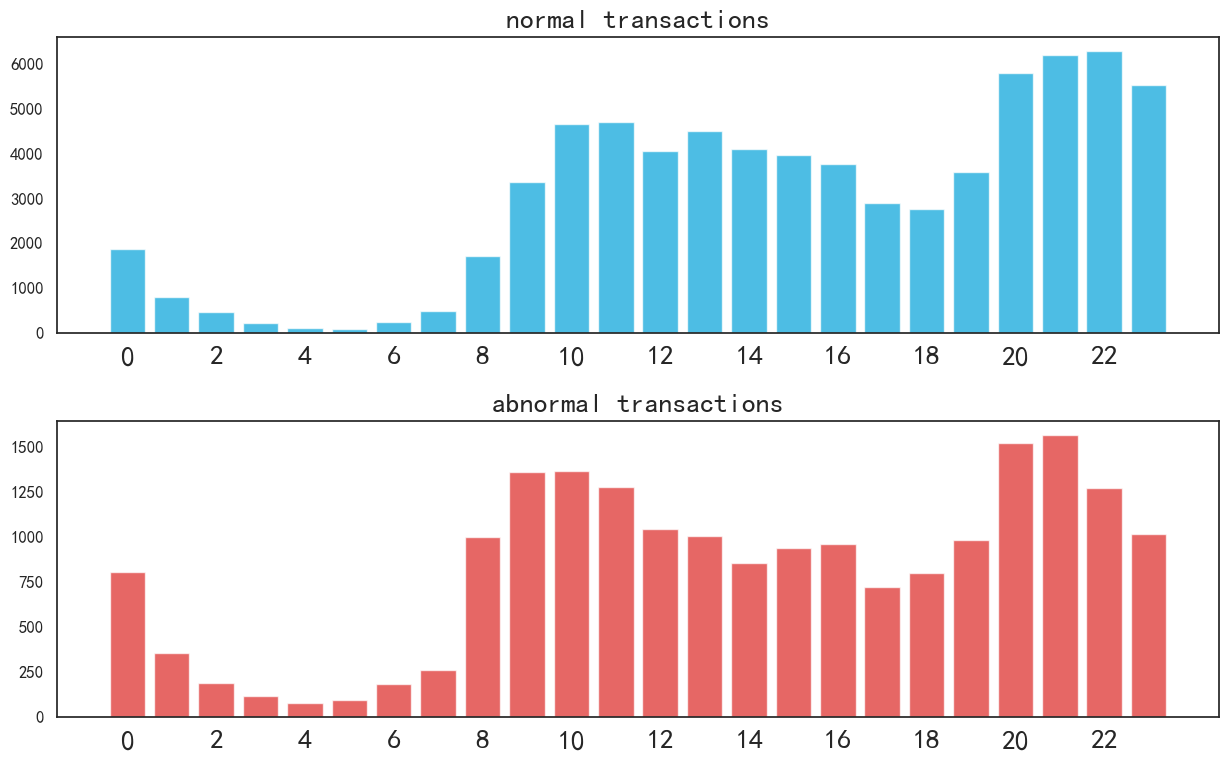

In [963]:
plt.figure(figsize=(15,9), dpi=100)
sns.set(style='white', font='Simhei', font_scale=1.1)

plt.subplot(211)
plt.bar(OrderTime_normal.index, OrderTime_normal.values, color='#01a2d9', alpha=0.7)
plt.title("normal transactions", fontsize=20)
plt.xticks(ticks=range(0,24,2), fontsize=20)

plt.subplot(212)
plt.bar(OrderTime_ab.index, OrderTime_ab.values, color='#dc2624', alpha=0.7)
plt.title("abnormal transactions", fontsize=20)
plt.xticks(ticks=range(0,24,2), fontsize=20)

plt.subplots_adjust(hspace=0.3)
plt.show()

Obviously, there is no significant difference between order_time of abnormal transactions and normal transactions, and **order_time is likely no related to abnormal transactions**.

However, this feature is still retained. But transform it into two new columns as order_hour and order_minute, order_minute is a value of 0 (<=30) or 1(>30), because there are often some promotion begin at some special time, so before 30 and after 30 may be an indicator .

In [978]:
Hour.name = 'order_hour'
train_min = train.order_time.apply(lambda x: (int(x[3:5])>30))*1
train_min.name = 'order_minute'
train = pd.concat([train, Hour, train_min], axis=1)
train.head()

,abnormal_label,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute
0,1,4283851335,2013-09-23,14:09:49,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,14,0
1,1,4276537082,2013-09-11,14:16:47,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,14,0
2,0,4106833871,2013-04-21,16:47:34,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,16,1
3,0,4276537218,2013-11-10,16:03:52,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,合并支付,qq-3be293b,泉州市,16,0
4,0,4281111696,2013-04-22,10:49:28,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1


In [980]:
test_Hour = test.order_time.apply(lambda x: int(x[:2]))
test_Hour.name = 'order_hour'
test_min = test.order_time.apply(lambda x: (int(x[3:5])>30))*1
test_min.name = 'order_minute'
test = pd.concat([test, test_Hour, test_min], axis=1)
test.head()

,abnormal_label,order_id,order_date,order_time,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute
0,1,4281111595,2013-04-10,10:44:46,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1
1,0,3977175284,2013-03-13,23:26:19,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,合并支付,swt6263122,宁德市,23,0
2,0,4245023523,2013-03-30,10:39:56,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1
3,0,4253622967,2013-01-27,21:15:59,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,合并支付,benson2570,宿迁市,21,0
4,0,4276159555,2013-05-26,16:49:49,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,合并支付,dakehu_zy,西安市,16,1


Drop order_time

In [984]:
train.drop(columns='order_time', inplace=True)
test.drop(columns='order_time', inplace=True)

In [985]:
train.to_csv('train.csv')
test.to_csv('test.csv')

### 3.3 pay_type :  anomaly risk evaluation of payment 

In [988]:
train.pay_type.value_counts()

合并支付    71893
货到付款    18330
当当支付     1242
在线支付      299
账户余额      136
Name: pay_type, dtype: int64

In [968]:
train

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute
0,1,4283851335,2013-09-23,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,合并支付,dakehu_zy,上海市,14,0
1,1,4276537082,2013-09-11,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,合并支付,qq-3be293b,泉州市,14,0
2,0,4106833871,2013-04-21,家居日用,POP,8002212182,品道天元,8800.0,100,主站,合并支付,qq-edf69d7,深圳市,16,1
3,0,4276537218,2013-11-10,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,合并支付,qq-3be293b,泉州市,16,0
4,0,4281111696,2013-04-22,家具建材,POP,8002199518,纬度空间,100.0,100,主站,合并支付,nonscorpio,广州市,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91895,0,4285745071,2013-05-13,生活电器厨卫电器,GO,1000380943,捷赛,398.0,1,主站,合并支付,qq-f1a32c7,廊坊市,23,1
91896,0,4285755067,2013-03-12,电视冰箱洗衣机空调,GO,1000296106,博世,2765.0,1,主站,货到付款,yanshuo3,北京市,23,1
91897,0,4285755076,2013-01-23,电视冰箱洗衣机空调,GO,1000296108,西门子,2672.0,1,主站,货到付款,yanshuo3,北京市,23,1
91898,0,4285770012,2013-09-19,家居日用,GO,1000335947,炊大师,79.0,1,抢购,合并支付,shukun,东莞市,23,1


In [969]:
train.groupby('pay_type').abnormal_label.mean()

pay_type
合并支付    0.273184
在线支付    0.227425
当当支付    0.041868
账户余额    0.029412
货到付款    0.000000
Name: abnormal_label, dtype: float64

In dataset, there are five types of payment methods, and the abnormal risks of orders under the five types of payment methods are different. Some payment methods can be very risky, such as combined payments (“合并支付”). If a merchant is clicking farming, or a competitor click farming maliciously, they should be inclined to use combined payment (“合并支付”) or online payment (“在线支付”). At the same time, cash on delivery is an unusually low-risk method, because the platform's cash on delivery function is often only open to users with extremely trusted or high credit ratings, so faking orders rarely occur. In contrast, the main abnormal risk of cash on delivery is logistics risk.

#### feature encoding for pay_type

In [989]:
# Encoding
train['pay_type'] = train.pay_type.astype('category').cat.codes
test['pay_type'] = test.pay_type.astype('category').cat.codes

In [990]:
train.pay_type.value_counts()

0    71893
4    18330
2     1242
1      299
3      136
Name: pay_type, dtype: int64

In [991]:
train.to_csv('train.csv')
test.to_csv('test.csv')

### 3.4 city : evaluation of delivery destination 

In [994]:
ChinaCity = pd.read_excel("ChinaCity.xls")
ChinaCity

,省份,市级
0,北京市,北京市
1,天津市,天津市
2,河北省,石家庄市
3,河北省,唐山市
4,河北省,秦皇岛市
...,...,...
404,辽宁省,辽宁省其他城市
405,四川省,四川省其他城市
406,广东省,广东省其他城市
407,云南省,云南省其他城市


In [995]:
ChinaCity.rename(columns={'省份': 'province', '市级': 'city'}, inplace=True)
ChinaCity.head()

,province,city
0,北京市,北京市
1,天津市,天津市
2,河北省,石家庄市
3,河北省,唐山市
4,河北省,秦皇岛市


In [604]:
data.city.unique()

array(['上海市', '泉州市', '广州市', '宁德市', '深圳市', '宿迁市', '西安市', '乌鲁木齐市', '长春市',
       '安庆市', '福州市', '秦皇岛市', '绍兴市', '天津市', '北京市', '沧州市', '石家庄市', '佛山市',
       '沈阳市', '成都市', '南京市', '长沙市', '海口市', '铜川市', '大庆市', '毕节地区', '汕尾市',
       '宁波市', '盐城市', '梅州市', '连云港市', '郑州市', '信阳市', '漯河市', '厦门市', '杭州市',
       '济南市', '东莞市', '惠州市', '大连市', '南平市', '防城港市', '温州市', '重庆市', '无锡市',
       '哈尔滨市', '呼和浩特市', '阜阳市', '台州市', '福建省其他城市', '潍坊市', '南昌市', '荷泽市',
       '湖南省其他城市', '驻马店市', '益阳市', '临沂市', '临汾市', '南宁市', '常州市', '烟台市', '临高县',
       '青岛市', '白银市', '中山市', '金华市', '武汉市', '随州市', '吉安市', '南通市', '丹东市',
       '东营市', '衡水市', '渭南市', '贵阳市', '仙桃市', '咸宁市', '承德市', '桂林市', '唐山市',
       '保定市', '株洲市', '嘉兴市', '抚州市', '鄂尔多斯市', '淄博市', '兴安盟', '襄樊市', '韶关市',
       '大理州', '十堰市', '柳州市', '太原市', '晋中市', '三明市', '昆明市', '泰安市', '合肥市',
       '内江市', '衢州市', '马鞍山市', '恩施州', '昌吉回族自治州', '荆州市', '百色市', '焦作市', '长治市',
       '扬州市', '红河州', '邯郸市', '宿州市', '新余市', '赣州市', '苏州市', '泰州市', '江门市',
       '阜新市', '廊坊市', '湘潭市', '芜湖市', '汕头市', '周口市', '莆田市', '延边州', '枣庄市',
 

In [996]:
ChinaCity = ChinaCity.set_index('city')
ChinaCity

,province
city,
北京市,北京市
天津市,天津市
石家庄市,河北省
唐山市,河北省
秦皇岛市,河北省
...,...
辽宁省其他城市,辽宁省
四川省其他城市,四川省
广东省其他城市,广东省


In [1000]:
train = train.join(ChinaCity, on='city', how='left')
train.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute,province
0,1,4283851335,2013-09-23,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,0,dakehu_zy,上海市,14,0,上海市
1,1,4276537082,2013-09-11,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,0,qq-3be293b,泉州市,14,0,福建省
2,0,4106833871,2013-04-21,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,深圳市,16,1,广东省
3,0,4276537218,2013-11-10,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,0,qq-3be293b,泉州市,16,0,福建省
4,0,4281111696,2013-04-22,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,10,1,广东省


In [1002]:
train[train.province.isnull()].province

27345    NaN
83220    NaN
Name: province, dtype: object

In [1003]:
train.province.fillna(train.city.apply(lambda x: x[:3]), inplace=True)
train.province.isnull().sum()

0

In [1004]:
train.iloc[[27345,83220]]

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute,province
27345,0,3809475249,2013-01-20,母婴用品玩具,POP,8001276188,大贸商,109.0,1,主站,0,guoqingas,山东省其他城市,10,1,山东省
83220,0,4283977714,2013-10-29,生活电器厨卫电器,GO,1000006426,飞利浦,299.0,1,主站,4,1587002842,江西省其他城市,13,1,江西省


In [1005]:
df = train.groupby('province').abnormal_label.mean().sort_values(ascending=False)
df

province
西藏自治区       0.379310
内蒙古自治区      0.301965
青海省         0.277778
海南省         0.274711
宁夏回族自治区     0.270142
山西省         0.259036
甘肃省         0.244745
北京市         0.241006
重庆市         0.239886
河北省         0.239856
吉林省         0.231707
陕西省         0.230467
江西省         0.229460
新疆维吾尔自治区    0.226601
河南省         0.225705
广东省         0.224040
浙江省         0.221844
云南省         0.218014
辽宁省         0.215016
天津市         0.213100
湖北省         0.209829
福建省         0.209691
山东省         0.208269
江苏省         0.206856
湖南省         0.206840
上海市         0.198120
广西壮族自治区     0.194180
四川省         0.189889
黑龙江省        0.174089
安徽省         0.172448
贵州省         0.062579
Name: abnormal_label, dtype: float64

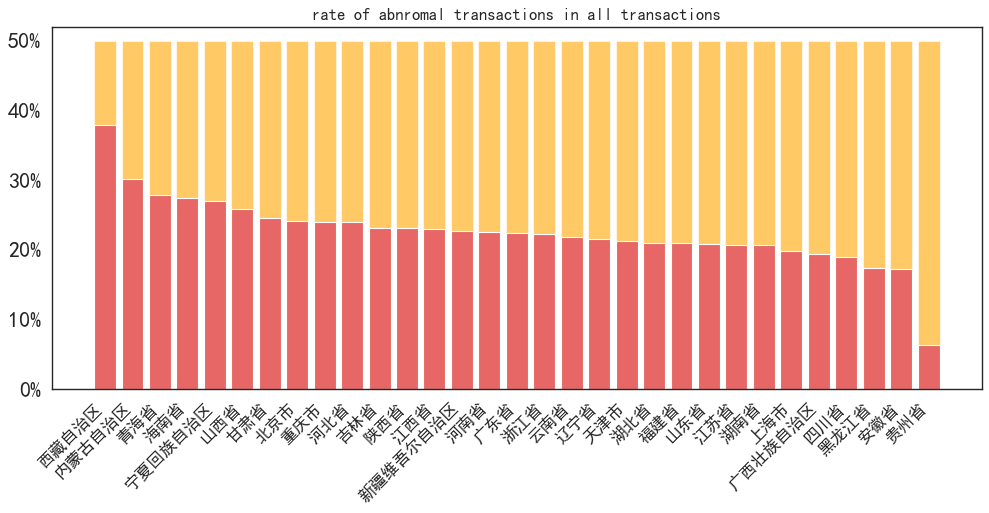

In [1006]:
plt.figure(figsize=(15,6), dpi=80)
sns.set(style='white', font='Simhei', font_scale=1.1)

plt.bar(df.index, 0.5, color='orange', alpha=0.6)
plt.bar(df.index, df.values, color='#e66765', alpha=1)
plt.title('rate of abnromal transactions in all transactions', fontsize=15)
plt.ylim(0, 0.52)
plt.yticks(ticks=np.arange(0,0.6,step=0.1), labels=['0%','10%','20%','30%','40%','50%'],fontsize=20)
plt.xticks(range(len(df)), df.index, fontsize=15, rotation=45, ha='right')
plt.show()

The abnormal rate shows great difference in provinces, among which the abnormal rate of '西藏自治区', '内蒙古自治区' and '青海省' is much higher than other regions, which may be caused by the low level of logistics development. Provinces and cities with more abnormal orders have more or less a large number of ethnic minority autonomous regions. At the same time, abnormal rate of '安徽省', '贵州省', etc. is very low (less than 20%), it is difficult to see the actual reason from the perspective of the province, which may be due to the small number of orders. The abnormal rate of most other cities is between 20% and 25%, indicating that this abnormal rate is normal for each province.

In [1007]:
test = test.join(ChinaCity, on='city', how='left')
test.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute,province
0,1,4281111595,2013-04-10,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,10,1,广东省
1,0,3977175284,2013-03-13,手机摄影数码,POP,8002237611,伊斯贝,990.0,100,主站,0,swt6263122,宁德市,23,0,福建省
2,0,4245023523,2013-03-30,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,10,1,广东省
3,0,4253622967,2013-01-27,电脑办公打印文仪,POP,8001748897,清华同方,880.0,100,主站,0,benson2570,宿迁市,21,0,江苏省
4,0,4276159555,2013-05-26,家居日用,GO,1000341307,乐扣乐扣,4900.0,100,主站,0,dakehu_zy,西安市,16,1,陕西省


In [1009]:
test[test.province.isnull()]

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute,province
9386,1,4282946649,2013-01-24,手机摄影数码,GO,1000376628,斐讯,399.0,1,主站,0,aiai131452,山西省其他城市,7,1,NaN


In [1010]:
test.province.fillna(test.city.apply(lambda x: x[:3]), inplace=True)
test.iloc[[9386]]

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute,province
9386,1,4282946649,2013-01-24,手机摄影数码,GO,1000376628,斐讯,399.0,1,主站,0,aiai131452,山西省其他城市,7,1,山西省


In [1011]:
df_test = test.groupby('province').abnormal_label.mean().sort_values(ascending=False)
df_test

province
青海省         0.571429
内蒙古自治区      0.298469
江西省         0.277129
陕西省         0.264182
甘肃省         0.250000
北京市         0.244660
天津市         0.237306
浙江省         0.234568
山西省         0.233474
重庆市         0.233058
新疆维吾尔自治区    0.231214
云南省         0.228856
海南省         0.228571
福建省         0.225971
河北省         0.224686
湖南省         0.221670
湖北省         0.218493
广东省         0.217169
山东省         0.215079
西藏自治区       0.214286
广西壮族自治区     0.212644
吉林省         0.211538
辽宁省         0.210191
上海市         0.202643
江苏省         0.202220
河南省         0.200269
四川省         0.191050
黑龙江省        0.174584
安徽省         0.149615
宁夏回族自治区     0.128205
贵州省         0.080818
Name: abnormal_label, dtype: float64

In [1012]:
df.name = 'province_abnormal_rate'
df_test.name = 'province_abnormal_rate'

In [1013]:
train = train.join(df, on='province', how='left')
test = test.join(df_test, on='province', how='left')

In [1014]:
train

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute,province,province_abnormal_rate
0,1,4283851335,2013-09-23,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,0,dakehu_zy,上海市,14,0,上海市,0.198120
1,1,4276537082,2013-09-11,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,0,qq-3be293b,泉州市,14,0,福建省,0.209691
2,0,4106833871,2013-04-21,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,深圳市,16,1,广东省,0.224040
3,0,4276537218,2013-11-10,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,0,qq-3be293b,泉州市,16,0,福建省,0.209691
4,0,4281111696,2013-04-22,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,10,1,广东省,0.224040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91895,0,4285745071,2013-05-13,生活电器厨卫电器,GO,1000380943,捷赛,398.0,1,主站,0,qq-f1a32c7,廊坊市,23,1,河北省,0.239856
91896,0,4285755067,2013-03-12,电视冰箱洗衣机空调,GO,1000296106,博世,2765.0,1,主站,4,yanshuo3,北京市,23,1,北京市,0.241006
91897,0,4285755076,2013-01-23,电视冰箱洗衣机空调,GO,1000296108,西门子,2672.0,1,主站,4,yanshuo3,北京市,23,1,北京市,0.241006
91898,0,4285770012,2013-09-19,家居日用,GO,1000335947,炊大师,79.0,1,抢购,0,shukun,东莞市,23,1,广东省,0.224040


In [1015]:
[train.isnull().sum().sum(), test.isnull().sum().sum()]

[0, 0]

* #### Another idea: by city type:

    Major cities in the province, First-tier cities, New first-tier cities, Second-tier cities, Other cities

In [1016]:
train['city_type'] = 'major'
# other cities
train.loc[train.city.apply(lambda x: '其他' in x), 'city_type'] = 'other'
# first-tier cities
tier1 = ['北京市', '上海市', '广州市', '深圳市']
train.loc[train.city.apply(lambda x: x in tier1), 'city_type'] = 'first_tier'
# new first-tier cities
newtier1 = ['成都市', '杭州市', '重庆市', '西安市', '苏州市', '武汉市', '南京市', '天津市', '郑州市', '长沙市', '东莞市', '佛山市', '宁波市', '青岛市', '沈阳市']
train.loc[train.city.apply(lambda x: x in newtier1), 'city_type'] = 'new_first_tier'
# second-tier cities
tier2 = ['昆明市', '合肥市', '无锡市', '厦门市', '济南市', '福州市', '温州市', '大连市', '哈尔滨市', '长春市', '泉州市', '石家庄市', '南宁市', '金华市', '贵阳市', '南昌市', '常州市', '嘉兴市', '珠海市', '南通市', '惠州市', '太原市', '中山市', '徐州市', '绍兴市', '台州市', '烟台市', '兰州市', '潍坊市', '临沂市']
train.loc[train.city.apply(lambda x: x in tier2), 'city_type'] = 'second_tier'

In [1017]:
train.city_type.value_counts()

major             30318
new_first_tier    22720
first_tier        21941
second_tier       16894
other                27
Name: city_type, dtype: int64

In [1018]:
df_city_type = train.groupby('city_type').abnormal_label.mean().sort_values(ascending=False)
df_city_type

city_type
first_tier        0.228932
second_tier       0.220374
new_first_tier    0.208847
major             0.206775
other             0.148148
Name: abnormal_label, dtype: float64

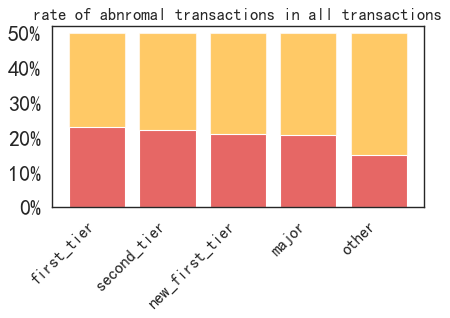

In [1019]:
plt.figure(figsize=(6,3), dpi=80)
sns.set(style='white', font='Simhei', font_scale=1.1)

plt.bar(df_city_type.index, 0.5, color='orange', alpha=0.6)
plt.bar(df_city_type.index, df_city_type.values, color='#e66765', alpha=1)
plt.title('rate of abnromal transactions in all transactions', fontsize=15)
plt.ylim(0, 0.52)
plt.yticks(ticks=np.arange(0,0.6,step=0.1), labels=['0%','10%','20%','30%','40%','50%'],fontsize=20)
plt.xticks(range(len(df_city_type)), df_city_type.index, fontsize=15, rotation=45, ha='right')
plt.show()

The abnormal rate shows little difference in city types, among which the abnormal rate of 'other' is lower than other regions. It is difficult to see the actual reason from the perspective of the city type, which may be due to the small number of orders. The abnormal rate of most cities is between 20.7% and 22%, indicating that this abnormal rate is normal for each city type.

In [1020]:
test['city_type'] = 'major'
# other cities
test.loc[test.city.apply(lambda x: '其他' in x), 'city_type'] = 'other'
# first-tier cities
test.loc[test.city.apply(lambda x: x in tier1), 'city_type'] = 'first_tier'
# new first-tier cities
test.loc[test.city.apply(lambda x: x in newtier1), 'city_type'] = 'new_first_tier'
# second-tier cities
test.loc[test.city.apply(lambda x: x in tier2), 'city_type'] = 'second_tier'

df_test_city_type = test.groupby('city_type').abnormal_label.mean()

df_city_type.name = 'city_type_abnormal_rate'
df_test_city_type.name = 'city_type_abnormal_rate'

train = train.join(df_city_type, on='city_type', how='left')
test = test.join(df_test_city_type, on='city_type', how='left')

train.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute,province,province_abnormal_rate,city_type,city_type_abnormal_rate
0,1,4283851335,2013-09-23,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,0,dakehu_zy,上海市,14,0,上海市,0.198120,first_tier,0.228932
1,1,4276537082,2013-09-11,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,0,qq-3be293b,泉州市,14,0,福建省,0.209691,second_tier,0.220374
2,0,4106833871,2013-04-21,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,深圳市,16,1,广东省,0.224040,first_tier,0.228932
3,0,4276537218,2013-11-10,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,0,qq-3be293b,泉州市,16,0,福建省,0.209691,second_tier,0.220374
4,0,4281111696,2013-04-22,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,广州市,10,1,广东省,0.224040,first_tier,0.228932


In [1021]:
[train.isnull().sum().sum(), test.isnull().sum().sum()]

[0, 0]

* #### feature encoding for city, province and city type.

In [1076]:
# Encoding function
def encodingCategory(column, train, test):
    
    train_category = train[column].astype('category')
    train[column] = train_category.cat.codes
    test_category = test[column].astype('category')
    test[column] = test_category.cat.codes
    
    return train, test

In [1026]:
for col in ['city', 'province', 'city_type']:
    train, test = encodingCategory(col, train, test)

In [1027]:
train.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,city,order_hour,order_minute,province,province_abnormal_rate,city_type,city_type_abnormal_rate
0,1,4283851335,2013-09-23,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,0,dakehu_zy,5,14,0,0,0.198120,0,0.228932
1,1,4276537082,2013-09-11,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,0,qq-3be293b,204,14,0,23,0.209691,4,0.220374
2,0,4106833871,2013-04-21,家居日用,POP,8002212182,品道天元,8800.0,100,主站,0,qq-edf69d7,220,16,1,11,0.224040,0,0.228932
3,0,4276537218,2013-11-10,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,0,qq-3be293b,204,16,0,23,0.209691,4,0.220374
4,0,4281111696,2013-04-22,家具建材,POP,8002199518,纬度空间,100.0,100,主站,0,nonscorpio,131,10,1,11,0.224040,0,0.228932


In [1034]:
print(train.shape, test.shape)
[train.isnull().sum().sum(), test.isnull().sum().sum()]

(91900, 19) (39382, 19)


[0, 0]

In [1035]:
train.to_csv('train.csv')
test.to_csv('test.csv')

### 3.5 cat & order_source & attribution

In [ ]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

If a certain category/ commodity has a high risk of return, extortion, and disputes, the proportion of abnormal orders in the orders of this category/ commodity should be high. If such a commodity exists, a high-risk commodity can be marked separately in feature engineering. Similarly, for order_source and pro_band, features can also be added according to the abnormal rate.

* #### cat

In [1041]:
df = train.groupby('cat').abnormal_label.mean().sort_values()
df

cat
美妆个护         0.151386
母婴用品玩具       0.160042
家纺寝居         0.177098
食品酒水         0.194547
生活电器厨卫电器     0.194576
电视冰箱洗衣机空调    0.199317
电脑办公打印文仪     0.215260
汽车用品         0.222909
运动户外         0.223991
家居日用         0.231841
健康医疗         0.235096
家具建材         0.244585
手机摄影数码       0.259741
服饰鞋帽         0.275546
图书音像         0.318750
箱包奢品         0.340520
钟表首饰         0.345000
Name: abnormal_label, dtype: float64

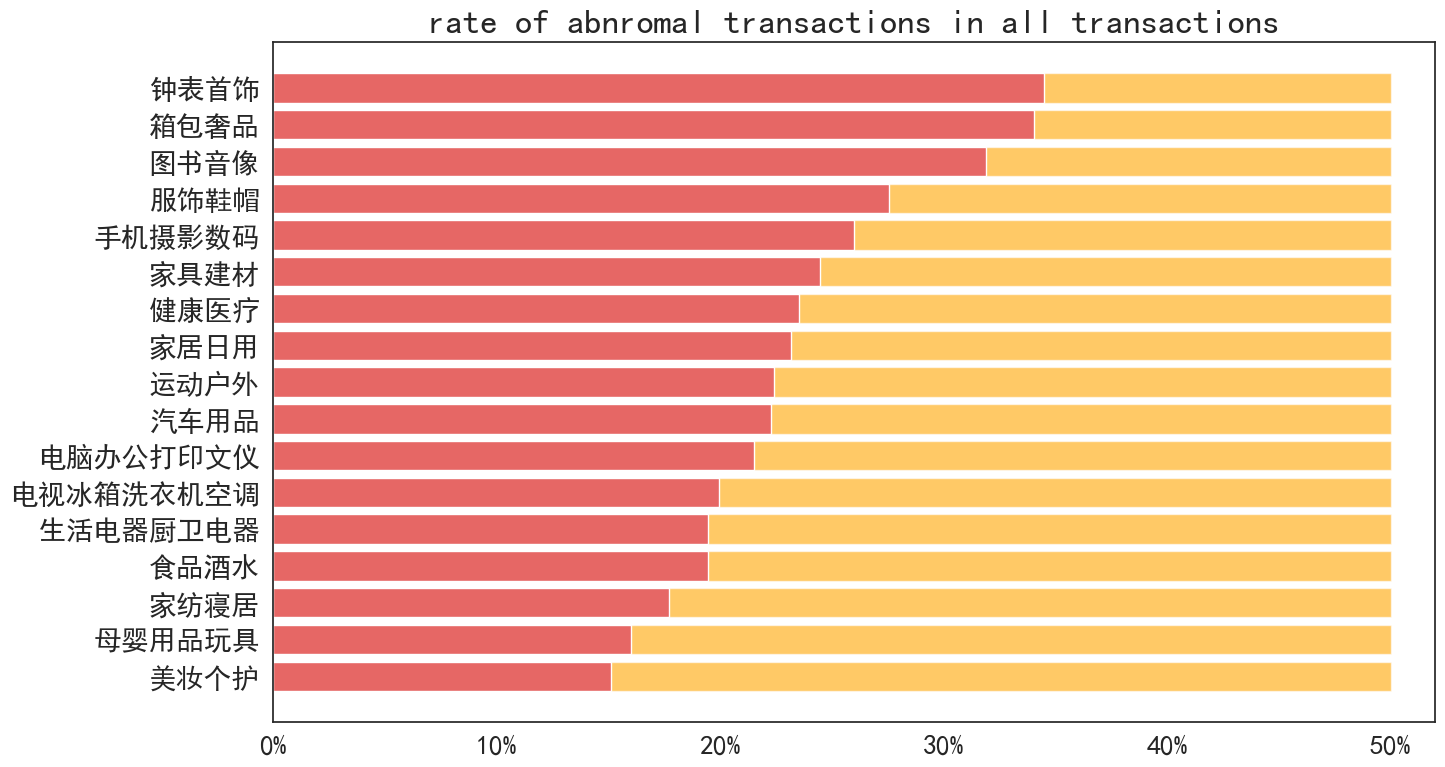

In [1047]:
plt.figure(figsize=(15,9), dpi=100)
sns.set(style='white', font='Simhei', font_scale=1.1)

plt.barh(df.index, 0.5, color='orange', alpha=0.6)
plt.barh(df.index, df.values, color='#e66765', alpha=1)
plt.title('rate of abnromal transactions in all transactions', fontsize=25)
plt.xlim(0, 0.52)
plt.xticks(ticks=np.arange(0,0.6,step=0.1), labels=['0%', '10%','20%','30%','40%','50%'],fontsize=20)
plt.yticks(range(len(df)), df.index, fontsize=20)
plt.show()

From the results, the highest proportion of abnormal transactions is '钟表首饰', '箱包奢品', '图书音像', and the lowest is '家纺寝居', '母婴用品玩具', and '美妆个护', but there is no situation that the abnormal proportion of a certain category is seriously higher than that of other categories. The abnormal rate can measure the risk that a category of commodities may be abnormal transactions. Therefore, in feature engineering, the category abnormal rate can be used as an aggregate feature and put into the feature matrix.

* #### order_source

In [1054]:
df2 = train.groupby('order_source').abnormal_label.mean().sort_values()
df2

order_source
do.site_id    0.100613
主站            0.166016
当当            0.191882
手机站点          0.289311
团购            0.333638
手机抢购          0.348422
抢购            0.397685
手机团购          0.481830
Name: abnormal_label, dtype: float64

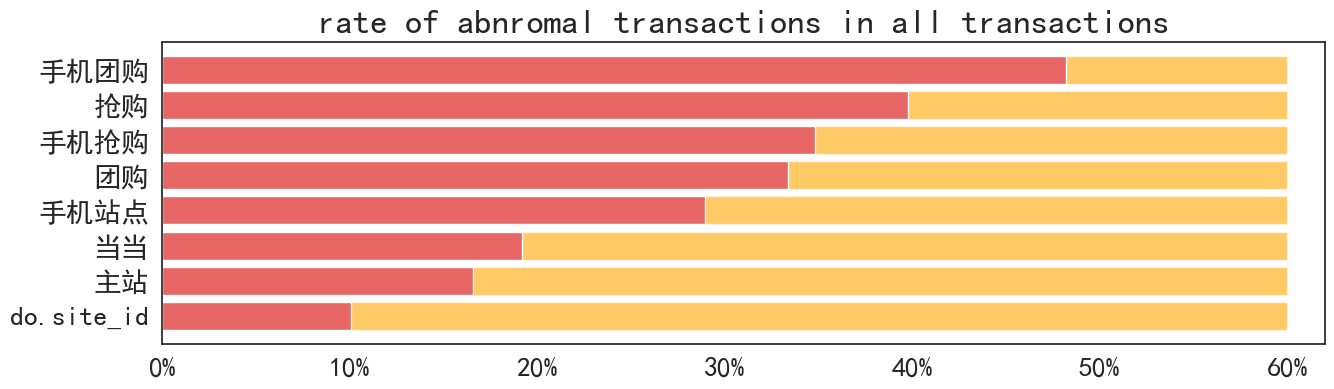

In [1058]:
plt.figure(figsize=(15,4), dpi=100)
sns.set(style='white', font='Simhei', font_scale=1.1)

plt.barh(df2.index, 0.6, color='orange', alpha=0.6)
plt.barh(df2.index, df2.values, color='#e66765', alpha=1)
plt.title('rate of abnromal transactions in all transactions', fontsize=25)
plt.xlim(0, 0.62)
plt.xticks(ticks=np.linspace(0,0.6,num=7), labels=['0%', '10%','20%','30%','40%','50%','60%'],fontsize=20)
plt.yticks(range(len(df2)), df2.index, fontsize=20)
plt.show()

It is not difficult to find that there is a high possibility of abnormality in group buying ('团购') and flash buying ('抢购') mode, and the possibility of abnormality on the mobile terminal is higher than that on the pc terminal.

* #### attribution

In [1061]:
df3 = train.groupby('attribution').abnormal_label.mean().sort_values()
df3

attribution
GO     0.177686
POP    0.291899
Name: abnormal_label, dtype: float64

Among 'attribution', the abnormal rate of POP stores is higher, while the abnormal rate of official self-operated stores is lower.

* #### adding new features

In [1062]:
def GroupByFeature(column, train, test, NewColumn):
    
    df_train = train.groupby(column).abnormal_label.mean()
    df_test = test.groupby(column).abnormal_label.mean()

    df_train.name = NewColumn
    df_test.name = NewColumn

    train = train.join(df_train, on=column, how='left')
    test = test.join(df_test, on=column, how='left')
    return train, test

In [1063]:
for i in ['cat', 'order_source', 'attribution']:
    train, test = GroupByFeature(i, train, test, i+'_abnormal_rate')

In [1065]:
train.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,city,order_hour,order_minute,province,province_abnormal_rate,city_type,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate
0,1,4283851335,2013-09-23,手机摄影数码,POP,8002042497,三星,766000.0,200,主站,...,5,14,0,0,0.198120,0,0.228932,0.259741,0.166016,0.291899
1,1,4276537082,2013-09-11,电视冰箱洗衣机空调,POP,8001992420,樱花,19900.0,100,主站,...,204,14,0,23,0.209691,4,0.220374,0.199317,0.166016,0.291899
2,0,4106833871,2013-04-21,家居日用,POP,8002212182,品道天元,8800.0,100,主站,...,220,16,1,11,0.224040,0,0.228932,0.231841,0.166016,0.291899
3,0,4276537218,2013-11-10,电视冰箱洗衣机空调,POP,8001992420,樱花,18900.0,100,主站,...,204,16,0,23,0.209691,4,0.220374,0.199317,0.166016,0.291899
4,0,4281111696,2013-04-22,家具建材,POP,8002199518,纬度空间,100.0,100,主站,...,131,10,1,11,0.224040,0,0.228932,0.244585,0.166016,0.291899


In [1066]:
print(train.shape, test.shape)
[train.isnull().sum().sum(), test.isnull().sum().sum()]

(91900, 22) (39382, 22)


[0, 0]

* #### feature encoding for 'cat', 'order_source', and 'attribution'.

In [1084]:
for i in ['cat', 'order_source', 'attribution']:
    train, test = encodingCategory(i, train, test)

In [1087]:
train.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,city,order_hour,order_minute,province,province_abnormal_rate,city_type,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate
0,1,4283851335,2013-09-23,5,1,8002042497,三星,766000.0,200,1,...,5,14,0,0,0.198120,0,0.228932,0.259741,0.166016,0.291899
1,1,4276537082,2013-09-11,11,1,8001992420,樱花,19900.0,100,1,...,204,14,0,23,0.209691,4,0.220374,0.199317,0.166016,0.291899
2,0,4106833871,2013-04-21,3,1,8002212182,品道天元,8800.0,100,1,...,220,16,1,11,0.224040,0,0.228932,0.231841,0.166016,0.291899
3,0,4276537218,2013-11-10,11,1,8001992420,樱花,18900.0,100,1,...,204,16,0,23,0.209691,4,0.220374,0.199317,0.166016,0.291899
4,0,4281111696,2013-04-22,2,1,8002199518,纬度空间,100.0,100,1,...,131,10,1,11,0.224040,0,0.228932,0.244585,0.166016,0.291899


In [1088]:
print(train.shape, test.shape)
[train.isnull().sum().sum(), test.isnull().sum().sum()]

(91900, 22) (39382, 22)


[0, 0]

In [1089]:
train.to_csv('train.csv')
test.to_csv('test.csv')

### 3.6 user_id & pro_id & pro_brand

In [1691]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [1642]:
for i in ['cat', 'city', 'user_id', 'pro_id', 'pro_brand']:
    cate = len(train[i].unique())
    print(i, cate)

cat 17
city 362
user_id 58462
pro_id 17161
pro_brand 2523


* #### user_id

58462 unique user_id

From a business point of view, the abnormal rate distribution of user orders should not be normal, but there are many people with low abnormal rate, few people with high abnormal rate, and basically no abnormal rate in the middle. Under this distribution, users with a high abnormal rate are abnormal users, and the orders of abnormal users can be classified as abnormal.

In [1643]:
# The number of users with only one order among 58462
(train.user_id.value_counts() == 1).sum()

44085

Most people only had one order, cannot analyze the abnormality for these people, -1 is given as the abnormality rate, indicating that these people are different from other types.

In [1644]:
# users with over one order 
# abnormal rate among these 14377 users with over one order 
MultiBuyRatio = train.groupby('user_id').abnormal_label.mean()[train.groupby('user_id').abnormal_label.count()>1]
MultiBuyRatio.describe([0.6, 0.7, 0.8, 0.9, 0.99])

count    14377.000000
mean         0.257924
std          0.346680
min          0.000000
50%          0.000000
60%          0.250000
70%          0.500000
80%          0.500000
90%          1.000000
99%          1.000000
max          1.000000
Name: abnormal_label, dtype: float64

More than 50% of users have never had an abnormal order.

* #### pro_id

17161 unique pro_id

First, observing the transaction volume. There may be multiple identical commodities in a transaction, so the transaction volume of commodities cannot be judged from the number of transactions alone. Here, it relies on another feature: total_quantity.

In [1645]:
ProIdQuant = train.groupby('pro_id').total_quantity.sum()
ProIdQuant

pro_id
1000000083    23
1000000098    82
1000000117     1
1000000162     2
1000000171     1
              ..
8002347798     3
8002348374     1
8002349432     8
8002351111     1
8002351933     1
Name: total_quantity, Length: 17161, dtype: int64

In [1362]:
ProIdQuant.describe()

count    17161.000000
mean         6.372239
std         38.252552
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2565.000000
Name: total_quantity, dtype: float64

The average sales number is only 6, so giving a rule that commodities with a sales number of less than 10 are products with too few transactions to judge their abnormal risk. For commodities with a transaction number greater than 10, calculate the abnormal rate:

In [1646]:
ProIdRatio = train.groupby('pro_id').abnormal_label.mean()[train.groupby('pro_id').total_quantity.sum()>=10]
ProIdRatio

pro_id
1000000083    0.043478
1000000098    0.109756
1000001030    0.074074
1000001054    0.149171
1000001066    0.714286
                ...   
8002340775    0.173077
8002340798    0.156740
8002341221    0.200000
8002341258    0.200000
8002344171    0.000000
Name: abnormal_label, Length: 1733, dtype: float64

In [1647]:
ProIdRatio.describe()

count    1733.000000
mean        0.227977
std         0.200547
min         0.000000
25%         0.085714
50%         0.181818
75%         0.333333
max         1.000000
Name: abnormal_label, dtype: float64

The abnormal rate of most products is less than 30%, which is in line with business logic.

* #### pro_brand

2523 unique pro_brand

Like pro_id, relying on sales number to measure brand transactions.

In [1648]:
ProBrandQuant = train.groupby('pro_brand').total_quantity.sum()
ProBrandQuant

pro_brand
100纷              1
21克profession     2
2H2D             12
3GUYS            19
3M               60
                 ..
齿素屋               1
龙威盛               3
龙富                2
龙的               46
龟牌               40
Name: total_quantity, Length: 2523, dtype: int64

In [1366]:
ProBrandQuant.describe()

count    2523.000000
mean       43.342846
std       198.010666
min         1.000000
25%         1.000000
50%         4.000000
75%        18.000000
max      3964.000000
Name: total_quantity, dtype: float64

The average sales number is 43, so giving a rule that commodities with a sales number of less than 50 are products with too few transactions to judge their abnormal risk. For commodities with a transaction number greater than 50, calculate the abnormal rate:

In [1649]:
ProBrandRatio = train.groupby('pro_brand').abnormal_label.mean()[train.groupby('pro_brand').total_quantity.sum()>=50]
ProBrandRatio.describe()

count    323.000000
mean       0.227892
std        0.131117
min        0.000000
25%        0.142052
50%        0.207101
75%        0.288653
max        0.885714
Name: abnormal_label, dtype: float64

The abnormal rate of most products is less than 30%, which is in line with business logic.

The user abnormal rate, product abnormal rate, and brand abnormal rate are used as aggregate features and put into the feature matrix. For trainset, it is very simple, the part with insufficient transaction volume is marked as -1, and the part with sufficient transaction volume is marked as abnormal rate. For testset, checking whether the ID of the test sample appears in trainset. If it does, use the value in trainset to fill it. If it does not appear, mark it as -1.

In [1650]:
df = pd.DataFrame(index=train.user_id.unique())
df['user_abnormal_rate'] = -1
df

,user_abnormal_rate
dakehu_zy,-1
qq-3be293b,-1
qq-edf69d7,-1
nonscorpio,-1
saabnan,-1
...,...
qq-335d87c,-1
qq-cb297c1,-1
qq-690593b,-1
qq-f1a32c7,-1


In [1651]:
df.loc[MultiBuyRatio.index, 'user_abnormal_rate'] = MultiBuyRatio
df

,user_abnormal_rate
dakehu_zy,0.1875
qq-3be293b,0.5000
qq-edf69d7,0.0000
nonscorpio,0.0000
saabnan,0.4000
...,...
qq-335d87c,-1.0000
qq-cb297c1,-1.0000
qq-690593b,-1.0000
qq-f1a32c7,-1.0000


In [1652]:
train = train.join(df, on='user_id', how='left')
train

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,order_hour,order_minute,province,province_abnormal_rate,city_type,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate
0,1,4283851335,2013-09-23,5,1,8002042497,三星,766000.0,200,1,...,14,0,0,0.198120,0,0.228932,0.259741,0.166016,0.291899,0.1875
1,1,4276537082,2013-09-11,11,1,8001992420,樱花,19900.0,100,1,...,14,0,23,0.209691,4,0.220374,0.199317,0.166016,0.291899,0.5000
2,0,4106833871,2013-04-21,3,1,8002212182,品道天元,8800.0,100,1,...,16,1,11,0.224040,0,0.228932,0.231841,0.166016,0.291899,0.0000
3,0,4276537218,2013-11-10,11,1,8001992420,樱花,18900.0,100,1,...,16,0,23,0.209691,4,0.220374,0.199317,0.166016,0.291899,0.5000
4,0,4281111696,2013-04-22,2,1,8002199518,纬度空间,100.0,100,1,...,10,1,11,0.224040,0,0.228932,0.244585,0.166016,0.291899,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91895,0,4285745071,2013-05-13,9,0,1000380943,捷赛,398.0,1,1,...,23,1,16,0.239856,1,0.206775,0.194576,0.166016,0.177686,-1.0000
91896,0,4285755067,2013-03-12,11,0,1000296106,博世,2765.0,1,1,...,23,1,3,0.241006,0,0.228932,0.199317,0.166016,0.177686,0.0000
91897,0,4285755076,2013-01-23,11,0,1000296108,西门子,2672.0,1,1,...,23,1,3,0.241006,0,0.228932,0.199317,0.166016,0.177686,0.0000
91898,0,4285770012,2013-09-19,3,0,1000335947,炊大师,79.0,1,7,...,23,1,11,0.224040,2,0.208847,0.231841,0.397685,0.177686,0.0000


In [1653]:
df_test = pd.DataFrame(index=test.user_id.unique())
df_test['user_abnormal_rate'] = -1
df_test

,user_abnormal_rate
nonscorpio,-1
swt6263122,-1
benson2570,-1
dakehu_zy,-1
tmall-4497,-1
...,...
1078911974,-1
361565453_,-1
1561190677,-1
tangweijun,-1


In [1654]:
for i in test.user_id:
    if i in  MultiBuyRatio.index:
        df_test.loc[i, 'user_abnormal_rate'] = MultiBuyRatio[i]
df_test

,user_abnormal_rate
nonscorpio,0.0000
swt6263122,-1.0000
benson2570,-1.0000
dakehu_zy,0.1875
tmall-4497,-1.0000
...,...
1078911974,-1.0000
361565453_,-1.0000
1561190677,-1.0000
tangweijun,-1.0000


In [1655]:
test = test.join(df_test, on='user_id', how='left')
test

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,order_hour,order_minute,province,province_abnormal_rate,city_type,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate
0,1,4281111595,2013-04-10,2,1,8002199518,纬度空间,100.0,100,1,...,10,1,11,0.217169,0,0.226138,0.257762,0.169770,0.294405,0.0000
1,0,3977175284,2013-03-13,5,1,8002237611,伊斯贝,990.0,100,1,...,23,0,23,0.225971,1,0.203434,0.263403,0.169770,0.294405,-1.0000
2,0,4245023523,2013-03-30,2,1,8002199518,纬度空间,100.0,100,1,...,10,1,11,0.217169,0,0.226138,0.257762,0.169770,0.294405,0.0000
3,0,4253622967,2013-01-27,10,1,8001748897,清华同方,880.0,100,1,...,21,0,14,0.202220,1,0.203434,0.221896,0.169770,0.294405,-1.0000
4,0,4276159555,2013-05-26,3,0,1000341307,乐扣乐扣,4900.0,100,1,...,16,1,28,0.264182,2,0.219068,0.232838,0.169770,0.178299,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39377,0,4285730302,2013-05-12,11,0,1000131074,海信,1499.0,1,7,...,23,1,20,0.218493,2,0.219068,0.200545,0.393516,0.178299,-1.0000
39378,0,4285735018,2013-09-08,8,1,8002340798,QD,199.0,1,7,...,23,1,3,0.244660,0,0.226138,0.209314,0.393516,0.294405,-1.0000
39379,0,4285735160,2013-01-08,15,0,1000365280,芝宝,198.0,1,1,...,23,1,14,0.202220,1,0.203434,0.378378,0.169770,0.178299,-1.0000
39380,0,4285740031,2013-02-15,9,0,1000009280,海尔,799.0,1,7,...,23,1,19,0.228571,1,0.203434,0.198806,0.393516,0.178299,-1.0000


Package the above into a function：

In [1656]:
def GroupByFeature2(column, train, test, newcolumn, ratio):
    
    df_train = pd.DataFrame(index=train[column].unique())
    df_train[newcolumn] = -1
    df_train.loc[ratio.index, newcolumn] = ratio
    train = train.join(df_train, on=column, how='left')
    
    df_test = pd.DataFrame(index=test[column].unique())
    df_test[newcolumn] = -1
    for i in test[column]:
        if i in  ratio.index:
            df_test.loc[i, newcolumn] = ratio[i]
    test = test.join(df_test, on=column, how='left')
    
    return train, test

In [1657]:
train, test = GroupByFeature2('pro_id', train, test, 'product_abnormal_rate', ProIdRatio)
train, test = GroupByFeature2('pro_brand', train, test, 'brand_abnormal_rate', ProBrandRatio)

In [1667]:
train.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,province,province_abnormal_rate,city_type,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate,product_abnormal_rate,brand_abnormal_rate
0,1,4283851335,2013-09-23,5,1,13074,196,766000.0,200,1,...,0,0.198120,0,0.228932,0.259741,0.166016,0.291899,0.1875,1.000000,0.332430
1,1,4276537082,2013-09-11,11,1,12695,1410,19900.0,100,1,...,23,0.209691,4,0.220374,0.199317,0.166016,0.291899,0.5000,0.333333,0.133333
2,0,4106833871,2013-04-21,3,1,15166,676,8800.0,100,1,...,11,0.224040,0,0.228932,0.231841,0.166016,0.291899,0.0000,0.204918,0.277620
3,0,4276537218,2013-11-10,11,1,12695,1410,18900.0,100,1,...,23,0.209691,4,0.220374,0.199317,0.166016,0.291899,0.5000,0.333333,0.133333
4,0,4281111696,2013-04-22,2,1,15028,1855,100.0,100,1,...,11,0.224040,0,0.228932,0.244585,0.166016,0.291899,0.0000,0.000000,0.000000


In [1668]:
test.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,province,province_abnormal_rate,city_type,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate,product_abnormal_rate,brand_abnormal_rate
0,1,4281111595,2013-04-10,2,1,15028,1855,100.0,100,1,...,11,0.217169,0,0.226138,0.257762,0.16977,0.294405,0.0000,0.000000,0.000000
1,0,3977175284,2013-03-13,5,1,15541,331,990.0,100,1,...,23,0.225971,1,0.203434,0.263403,0.16977,0.294405,-1.0000,0.076923,0.392593
2,0,4245023523,2013-03-30,2,1,15028,1855,100.0,100,1,...,11,0.217169,0,0.226138,0.257762,0.16977,0.294405,0.0000,0.000000,0.000000
3,0,4253622967,2013-01-27,10,1,11470,1569,880.0,100,1,...,14,0.202220,1,0.203434,0.221896,0.16977,0.294405,-1.0000,0.409091,0.300781
4,0,4276159555,2013-05-26,3,0,4835,254,4900.0,100,1,...,28,0.264182,2,0.219068,0.232838,0.16977,0.178299,0.1875,0.148148,0.191809


In [1659]:
print(train.shape, test.shape)
[train.isnull().sum().sum(), test.isnull().sum().sum()]

(91900, 25) (39382, 25)


[0, 0]

* #### feature encoding for 'user_id', 'pro_id', and 'pro_brand'.

In [1660]:
# Encoding function for complexe types columns (user_id, pro_id, pro_brand)
def encodingCategory2(column, train, test):    
    
    # extract the column from trainset as a new dataframe, with column as the index, original index as values
    df_col_train = pd.DataFrame(range(train.shape[0]), index=train[column], columns=['train_index'])
    # unduplicate
    df_col_train = df_col_train[~df_col_train.index.duplicated(keep='first')]
    # extract the column from testset as a new dataframe
    df_col_test = pd.DataFrame(test[column])
    # join the trainset index to testset, which have the same column values
    df_col_test_trainIndex = df_col_test.join(df_col_train, on=column, how='left')
    
    # column encoding for trainset
    train_category = train[column].astype('category')
    train[column] = train_category.cat.codes
    
    # replace those same column values appeared in train column, with train column already encoded values
    if df_col_test_trainIndex.train_index.isnull().sum() < c.shape[0]:
        exist = df_col_test_trainIndex.loc[~df_col_test_trainIndex['train_index'].isnull(), 'train_index'].apply(lambda x: train.loc[int(x), column])
        df_col_test_trainIndex['train_index'].iloc[exist.index] = exist
        test[column] = df_col_test_trainIndex['train_index']
    
    
    # index of column values appeared in testset but not in trainset
    index_test_only = test.index[test[column].isnull()]
    # encoding for other test column values
    test_category = test[column].iloc[index_test_only].astype('category')
    test[column].iloc[index_test_only] = test_category.cat.codes + train[column].max() # different from trainset column values
    test[column] = test[column].astype('int64')
    
    return train, test

In [1661]:
for i in ['user_id', 'pro_id', 'pro_brand']:
    train, test = encodingCategory2(i, train, test)

In [1665]:
test

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,province,province_abnormal_rate,city_type,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate,product_abnormal_rate,brand_abnormal_rate
0,1,4281111595,2013-04-10,2,1,15028,1855,100.0,100,1,...,11,0.217169,0,0.226138,0.257762,0.169770,0.294405,0.0000,0.000000,0.000000
1,0,3977175284,2013-03-13,5,1,15541,331,990.0,100,1,...,23,0.225971,1,0.203434,0.263403,0.169770,0.294405,-1.0000,0.076923,0.392593
2,0,4245023523,2013-03-30,2,1,15028,1855,100.0,100,1,...,11,0.217169,0,0.226138,0.257762,0.169770,0.294405,0.0000,0.000000,0.000000
3,0,4253622967,2013-01-27,10,1,11470,1569,880.0,100,1,...,14,0.202220,1,0.203434,0.221896,0.169770,0.294405,-1.0000,0.409091,0.300781
4,0,4276159555,2013-05-26,3,0,4835,254,4900.0,100,1,...,28,0.264182,2,0.219068,0.232838,0.169770,0.178299,0.1875,0.148148,0.191809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39377,0,4285730302,2013-05-12,11,0,1320,1545,1499.0,1,7,...,20,0.218493,2,0.219068,0.200545,0.393516,0.178299,-1.0000,0.187500,0.189873
39378,0,4285735018,2013-09-08,8,1,17123,101,199.0,1,7,...,3,0.244660,0,0.226138,0.209314,0.393516,0.294405,-1.0000,0.156740,0.222458
39379,0,4285735160,2013-01-08,15,0,17159,2033,198.0,1,1,...,14,0.202220,1,0.203434,0.378378,0.169770,0.178299,-1.0000,-1.000000,0.250000
39380,0,4285740031,2013-02-15,9,0,188,1547,799.0,1,7,...,19,0.228571,1,0.203434,0.198806,0.393516,0.178299,-1.0000,0.083333,0.194175


In [1695]:
print(train.shape, test.shape)
[train.isnull().sum().sum(), test.isnull().sum().sum()]

(91900, 25) (39382, 25)


[0, 0]

In [1669]:
train.to_csv('train.csv')
test.to_csv('test.csv')

### 3.7 total_money & total_quantity

In the B2C or C2C e-commerce, most of the transaction objects are with individual users, so if the order amount is too large, or the quantity sold at one time is too large, there is a high possibility that the order is abnormal. According to abnormal_label, perhaps high-value orders and high-volume orders are also abnormal transactions. The value distribution of abnormal transactions and normal transactions can be compared to determine whether high-value orders are more likely to be considered abnormal.


In [1693]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [1694]:
train.groupby('abnormal_label')['total_money'].mean()

abnormal_label
0    610.562638
1    884.468230
Name: total_money, dtype: float64

In [1696]:
ab = train.loc[train.abnormal_label==1, 'total_money']
normal =train.loc[train.abnormal_label==0, 'total_money']

In [1697]:
ab.describe()

count     19764.000000
mean        884.468230
std        5703.586508
min           0.500000
25%          49.000000
50%         109.000000
75%         659.000000
max      766000.000000
Name: total_money, dtype: float64

In [1698]:
normal.describe()

count     72136.000000
mean        610.562638
std        2205.608241
min           0.500000
25%          22.900000
50%          90.450000
75%         338.000000
max      383000.000000
Name: total_money, dtype: float64

The total_money average of abnormal transactions is high, and the variance is also high. Drawing a distribution diagram to take a look.

In [1674]:
import seaborn as sns

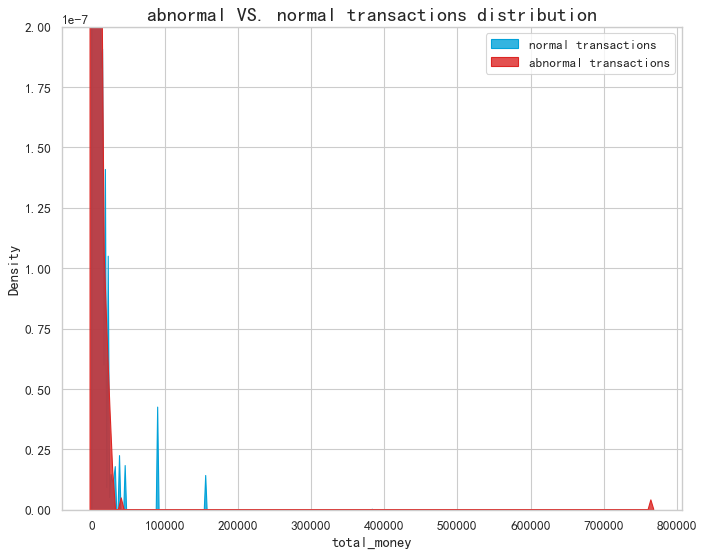

In [1699]:
plt.figure(figsize=(10,8), dpi=80)
sns.kdeplot(normal, shade=True, color='#01a2d9', label='normal transactions', alpha=.8)
sns.kdeplot(ab, shade=True, color='#dc2624', label='abnormal transactions', alpha=.8)

sns.set(style='whitegrid', font='simhei', font_scale=1.1)
plt.title("abnormal VS. normal transactions distribution", fontsize=18)
plt.ylim((0, 0.0000002))
plt.legend()
plt.show()

The distribution of abnormal transactions in order amount has a very long tail, while normal transactions form a small peak at some point around 260,000. Obviously, all transactions with an order amount greater than 300,000 are **abnormal transactions**. Before 260,000, there was no significant difference between the amount of abnormal transactions and normal transactions. The order amount can be binned and the abnormal transactions in each bin can be compared. If the bins differ significantly, new features can be created based on the results.

In [1688]:
from sklearn.preprocessing import KBinsDiscretizer as KBD

In [1700]:
enc = KBD(n_bins=10, encode='ordinal', strategy='kmeans').fit(pd.DataFrame(train['total_money']))

In [1701]:
train['amount_bins'] = enc.transform(pd.DataFrame(train['total_money']))

In [1703]:
train.groupby('amount_bins')['total_money'].min()

amount_bins
0.0         0.5
1.0       995.0
2.0      3056.0
3.0      6666.0
4.0     12897.0
5.0     25790.0
6.0     81200.0
7.0    155999.0
8.0    383000.0
9.0    766000.0
Name: total_money, dtype: float64

In [1704]:
train.groupby('amount_bins')['total_money'].max()

amount_bins
0.0       992.0
1.0      3029.0
2.0      6638.0
3.0     12800.0
4.0     23998.0
5.0     45490.0
6.0     92980.0
7.0    155999.0
8.0    383000.0
9.0    766000.0
Name: total_money, dtype: float64

In [1705]:
df = pd.DataFrame(index=train.groupby('amount_bins')['total_money'].max().index)

In [1706]:
df['lower_bound'] = train.groupby('amount_bins')['total_money'].min()
df['upper_bound'] = train.groupby('amount_bins')['total_money'].max()
df # from the sixth amount_bins, there's big jump. 
# And 7th, 8th, 9th bins have just one value

,lower_bound,upper_bound
amount_bins,,
0.0,0.5,992.0
1.0,995.0,3029.0
2.0,3056.0,6638.0
3.0,6666.0,12800.0
4.0,12897.0,23998.0
5.0,25790.0,45490.0
6.0,81200.0,92980.0
7.0,155999.0,155999.0
8.0,383000.0,383000.0


In [1717]:
train_avg_amount_bins = train.groupby('amount_bins')['total_money'].mean()
train_avg_amount_bins.name = 'avg_amount_bins'
train_avg_amount_bins

amount_bins
0.0       138.532578
1.0      1846.233721
2.0      4248.595797
3.0      9046.585106
4.0     16572.240741
5.0     31749.000000
6.0     88535.000000
7.0    155999.000000
8.0    383000.000000
9.0    766000.000000
Name: avg_amount_bins, dtype: float64

In [1718]:
test['amount_bins'] = enc.transform(pd.DataFrame(test['total_money']))
test_avg_amount_bins = test.groupby('amount_bins')['total_money'].mean()
test_avg_amount_bins.name = 'avg_amount_bins'
test_avg_amount_bins

amount_bins
0.0       138.324448
1.0      1874.223392
2.0      4226.495046
3.0      8954.519164
4.0     16246.895833
5.0     39354.666667
6.0     82900.000000
7.0    155999.000000
Name: avg_amount_bins, dtype: float64

adding also the average of bins to trainset and testset

In [1719]:
train = train.join(train_avg_amount_bins, on='amount_bins', how='left')
test = test.join(test_avg_amount_bins, on='amount_bins', how='left')

In [1720]:
train.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,city_type,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate,product_abnormal_rate,brand_abnormal_rate,amount_bins,avg_amount_bins
0,1,4283851335,2013-09-23,5,1,13074,196,766000.0,200,1,...,0,0.228932,0.259741,0.166016,0.291899,0.1875,1.000000,0.332430,9.0,766000.000000
1,1,4276537082,2013-09-11,11,1,12695,1410,19900.0,100,1,...,4,0.220374,0.199317,0.166016,0.291899,0.5000,0.333333,0.133333,4.0,16572.240741
2,0,4106833871,2013-04-21,3,1,15166,676,8800.0,100,1,...,0,0.228932,0.231841,0.166016,0.291899,0.0000,0.204918,0.277620,3.0,9046.585106
3,0,4276537218,2013-11-10,11,1,12695,1410,18900.0,100,1,...,4,0.220374,0.199317,0.166016,0.291899,0.5000,0.333333,0.133333,4.0,16572.240741
4,0,4281111696,2013-04-22,2,1,15028,1855,100.0,100,1,...,0,0.228932,0.244585,0.166016,0.291899,0.0000,0.000000,0.000000,0.0,138.532578


In [1721]:
test.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,city_type,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate,product_abnormal_rate,brand_abnormal_rate,amount_bins,avg_amount_bins
0,1,4281111595,2013-04-10,2,1,15028,1855,100.0,100,1,...,0,0.226138,0.257762,0.16977,0.294405,0.0000,0.000000,0.000000,0.0,138.324448
1,0,3977175284,2013-03-13,5,1,15541,331,990.0,100,1,...,1,0.203434,0.263403,0.16977,0.294405,-1.0000,0.076923,0.392593,0.0,138.324448
2,0,4245023523,2013-03-30,2,1,15028,1855,100.0,100,1,...,0,0.226138,0.257762,0.16977,0.294405,0.0000,0.000000,0.000000,0.0,138.324448
3,0,4253622967,2013-01-27,10,1,11470,1569,880.0,100,1,...,1,0.203434,0.221896,0.16977,0.294405,-1.0000,0.409091,0.300781,0.0,138.324448
4,0,4276159555,2013-05-26,3,0,4835,254,4900.0,100,1,...,2,0.219068,0.232838,0.16977,0.178299,0.1875,0.148148,0.191809,2.0,4226.495046


* #### total_quantity

In [1722]:
ab = train.loc[train.abnormal_label==1, 'total_quantity']
normal =train.loc[train.abnormal_label==0, 'total_quantity']

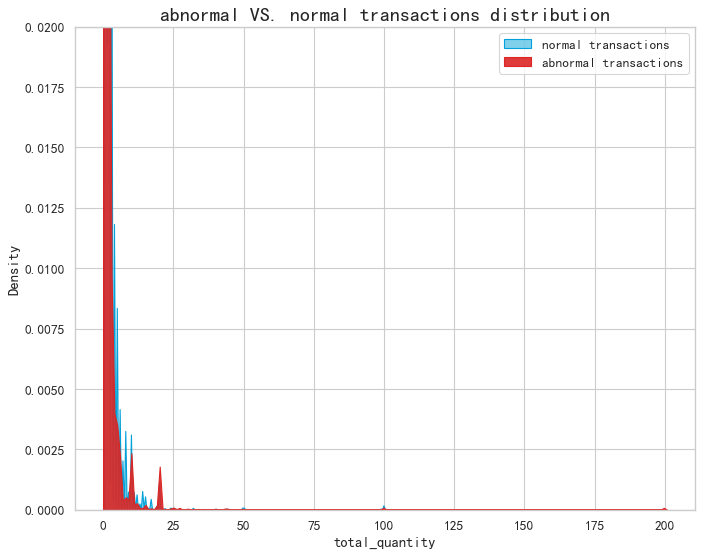

In [1727]:
plt.figure(figsize=(10,8), dpi=80)
sns.kdeplot(normal, shade=True, color='#01a2d9', label='normal transactions', alpha=.5)
sns.kdeplot(ab, shade=True, color='#dc2624', label='abnormal transactions', alpha=.9)

sns.set(style='whitegrid', font='simhei', font_scale=1.1)
plt.title("abnormal VS. normal transactions distribution", fontsize=18)
plt.ylim((0, 0.02))
plt.legend()
plt.show()

All transactions with an order quantity greater than 20 are mostly abnormal transactions. Before 20, there was no significant difference between abnormal transactions and normal transactions. From the results of describe, it seems that 99% of normal transactions and abnormal transactions are orders of less than 5 items at a time. From this point of view, it is likely that the total_quality feature is not helpful for the prediction of the model. Therefore, perform a simple binarization operation on this feature: if it is greater than 25, it is a high-risk transaction, marked as 1, otherwise it is a low-risk transaction, marked as 0

In [1731]:
ab.describe([0.6,0.7, 0.8, 0.9, 0.99])

count    19764.000000
mean         1.187108
std          2.099533
min          1.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
99%          5.000000
max        200.000000
Name: total_quantity, dtype: float64

In [1732]:
normal.describe([0.6,0.7, 0.8, 0.9, 0.99])

count    72136.000000
mean         1.190695
std          1.541113
min          1.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
99%          5.000000
max        100.000000
Name: total_quantity, dtype: float64

In [1733]:
train['quantity_bins'] = 0
train.loc[train.total_quantity>25, 'quantity_bins'] = 1

test['quantity_bins'] = 0
test.loc[test.total_quantity>25, 'quantity_bins'] = 1

train.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate,product_abnormal_rate,brand_abnormal_rate,amount_bins,avg_amount_bins,quantity_bins
0,1,4283851335,2013-09-23,5,1,13074,196,766000.0,200,1,...,0.228932,0.259741,0.166016,0.291899,0.1875,1.000000,0.332430,9.0,766000.000000,1
1,1,4276537082,2013-09-11,11,1,12695,1410,19900.0,100,1,...,0.220374,0.199317,0.166016,0.291899,0.5000,0.333333,0.133333,4.0,16572.240741,1
2,0,4106833871,2013-04-21,3,1,15166,676,8800.0,100,1,...,0.228932,0.231841,0.166016,0.291899,0.0000,0.204918,0.277620,3.0,9046.585106,1
3,0,4276537218,2013-11-10,11,1,12695,1410,18900.0,100,1,...,0.220374,0.199317,0.166016,0.291899,0.5000,0.333333,0.133333,4.0,16572.240741,1
4,0,4281111696,2013-04-22,2,1,15028,1855,100.0,100,1,...,0.228932,0.244585,0.166016,0.291899,0.0000,0.000000,0.000000,0.0,138.532578,1


In [1734]:
test.head()

,abnormal_label,order_id,order_date,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,...,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate,product_abnormal_rate,brand_abnormal_rate,amount_bins,avg_amount_bins,quantity_bins
0,1,4281111595,2013-04-10,2,1,15028,1855,100.0,100,1,...,0.226138,0.257762,0.16977,0.294405,0.0000,0.000000,0.000000,0.0,138.324448,1
1,0,3977175284,2013-03-13,5,1,15541,331,990.0,100,1,...,0.203434,0.263403,0.16977,0.294405,-1.0000,0.076923,0.392593,0.0,138.324448,1
2,0,4245023523,2013-03-30,2,1,15028,1855,100.0,100,1,...,0.226138,0.257762,0.16977,0.294405,0.0000,0.000000,0.000000,0.0,138.324448,1
3,0,4253622967,2013-01-27,10,1,11470,1569,880.0,100,1,...,0.203434,0.221896,0.16977,0.294405,-1.0000,0.409091,0.300781,0.0,138.324448,1
4,0,4276159555,2013-05-26,3,0,4835,254,4900.0,100,1,...,0.219068,0.232838,0.16977,0.178299,0.1875,0.148148,0.191809,2.0,4226.495046,1


In [1743]:
train.drop(columns='order_date', inplace=True)
test.drop(columns='order_date', inplace=True)

In [1744]:
train.to_csv('train.csv')
test.to_csv('test.csv')

## 4. Model building: Using fusion models to make predictions.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [5]:
Xtrain = train.iloc[:, 1:]
ytrain = train.iloc[:, 0]

Xtest = test.iloc[:, 1:]
ytest = test.iloc[:, 0]

In [6]:
Xtrain.head()

,order_id,cat,attribution,pro_id,pro_brand,total_money,total_quantity,order_source,pay_type,user_id,...,city_type_abnormal_rate,cat_abnormal_rate,order_source_abnormal_rate,attribution_abnormal_rate,user_abnormal_rate,product_abnormal_rate,brand_abnormal_rate,amount_bins,avg_amount_bins,quantity_bins
0,4283851335,5,1,13074,196,766000.0,200,1,0,18478,...,0.228932,0.259741,0.166016,0.291899,0.1875,1.000000,0.332430,9.0,766000.000000,1
1,4276537082,11,1,12695,1410,19900.0,100,1,0,37920,...,0.220374,0.199317,0.166016,0.291899,0.5000,0.333333,0.133333,4.0,16572.240741,1
2,4106833871,3,1,15166,676,8800.0,100,1,0,42284,...,0.228932,0.231841,0.166016,0.291899,0.0000,0.204918,0.277620,3.0,9046.585106,1
3,4276537218,11,1,12695,1410,18900.0,100,1,0,37920,...,0.220374,0.199317,0.166016,0.291899,0.5000,0.333333,0.133333,4.0,16572.240741,1
4,4281111696,2,1,15028,1855,100.0,100,1,0,34608,...,0.228932,0.244585,0.166016,0.291899,0.0000,0.000000,0.000000,0.0,138.532578,1


In [7]:
rf = RFC(n_estimators=200, random_state=1111)
gbdc = GBC(n_estimators=200, random_state=1111)

In [8]:
rf = rf.fit(Xtrain, ytrain)
rf.score(Xtrain, ytrain)

0.9986289445048966

In [9]:
rf.score(Xtest, ytest) # random forest, severely overfitting

0.8185465441064446

In [10]:
rf_prediction = rf.predict(Xtest)
rf_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
accuracy_score(ytest, rf_prediction)

0.8185465441064446

In [15]:
gbdc = gbdc.fit(Xtrain, ytrain)
gbdc.score(Xtrain, ytrain)

0.8833079434167573

In [16]:
gbdc.score(Xtest, ytest) # GBDC better on overfitting, but with lower upper bound

0.8148138743588441

In [17]:
gbdc_prediction = gbdc.predict(Xtest)
gbdc_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
accuracy_score(ytest, gbdc_prediction)

0.8148138743588441

Observe the results using the fusion model

In [19]:
estimators = [('RandomForest',rf), ('GBDC',gbdc)]
vot = VotingClassifier(estimators=estimators, voting='soft', weights=[0.9,1.2], n_jobs=-1)

In [20]:
vot = vot.fit(Xtrain, ytrain)
vot.score(Xtrain, ytrain)

0.9451686615886834

In [21]:
vot.score(Xtest, ytest) # overall performance is over-fitting, and needs to continue to be tuned

0.8171499669899954

In [22]:
vot_prediction = vot.predict(Xtest)
vot_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
accuracy_score(ytest, vot_prediction)

0.8171499669899954